### Importing Libraries

In [1]:
import pandas as pd # for data preprocessing
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import xgboost
import joblib
import os
%matplotlib inline

# If you want to show all the rows of pandas dataframe
# pd.set_option('display.max_rows', None)

In [2]:
data1 = pd.read_csv('./drug review dataset drugs.com/drugsComTrain_raw.tsv',sep='\t')
data1.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

#### Variable Information
1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful

In [3]:
data2 = pd.read_csv('./drug review dataset drugs.com/drugsComTest_raw.tsv',sep='\t')
data2.head()

Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  
0   February 28, 2012           22  
1        May 17, 2009           17  
2  September 29, 2017            3  
3       March 5, 2017           35  
4    October 22, 2015            4

In [4]:
data1.info(), data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date         53766 non-null  objec

(None, None)

In [5]:
data1.shape,data2.shape

((161297, 7), (53766, 7))

In [6]:
data = pd.concat([data1,data2],axis=0)
data.duplicated().sum()

0

In [7]:
data=shuffle(data,random_state=0).reset_index(drop=True)
data.shape

(215063, 7)

In [8]:
data.head()

Unnamed: 0                       drugName                    condition  \
0        4753                         Belviq                  Weight Loss   
1       67134            Magnesium hydroxide                 Constipation   
2        6918  Aluminum chloride hexahydrate                Hyperhidrosis   
3      164803       Phentermine / topiramate                  Weight Loss   
4      177619                     Duloxetine  Generalized Anxiety Disorde   

                                              review  rating  \
0  "WARNING...... NEVER STOP THIS MEDICATION COLD...     1.0   
1  "Oh my word! This stuff saved my life. It took...     7.0   
2  "It worked very well for the first 2 weeks wit...     6.0   
3  "I&#039;m a 5&#039;11 205lb size 12 former ath...     8.0   
4  "I initially took Cymbalta for distonia, which...    10.0   

                date  usefulCount  
0      June 18, 2015           52  
1     April 10, 2016           21  
2    August 20, 2016            2  
3  November 27, 2016           24  
4      July 30, 2015           67

In [9]:
if not os.path.exists('./drug review dataset drugs.com'):
    os.makedirs('./drug review dataset drugs.com')
data.to_csv("./drug review dataset drugs.com/DrugsComPatient_raw.csv",index=False)

In [10]:
data.reset_index(drop=True,inplace=True)
data.to_pickle("./drug review dataset drugs.com/DrugsComPatient_raw.pkl")
main = pd.read_pickle("./drug review dataset drugs.com/DrugsComPatient_raw.pkl")
main.head()

Unnamed: 0                       drugName                    condition  \
0        4753                         Belviq                  Weight Loss   
1       67134            Magnesium hydroxide                 Constipation   
2        6918  Aluminum chloride hexahydrate                Hyperhidrosis   
3      164803       Phentermine / topiramate                  Weight Loss   
4      177619                     Duloxetine  Generalized Anxiety Disorde   

                                              review  rating  \
0  "WARNING...... NEVER STOP THIS MEDICATION COLD...     1.0   
1  "Oh my word! This stuff saved my life. It took...     7.0   
2  "It worked very well for the first 2 weeks wit...     6.0   
3  "I&#039;m a 5&#039;11 205lb size 12 former ath...     8.0   
4  "I initially took Cymbalta for distonia, which...    10.0   

                date  usefulCount  
0      June 18, 2015           52  
1     April 10, 2016           21  
2    August 20, 2016            2  
3  November 27, 2016           24  
4      July 30, 2015           67

In [11]:
main_data = pd.read_csv('./drug review dataset drugs.com/DrugsComPatient_raw.csv')
main_data.head()

Unnamed: 0                       drugName                    condition  \
0        4753                         Belviq                  Weight Loss   
1       67134            Magnesium hydroxide                 Constipation   
2        6918  Aluminum chloride hexahydrate                Hyperhidrosis   
3      164803       Phentermine / topiramate                  Weight Loss   
4      177619                     Duloxetine  Generalized Anxiety Disorde   

                                              review  rating  \
0  "WARNING...... NEVER STOP THIS MEDICATION COLD...     1.0   
1  "Oh my word! This stuff saved my life. It took...     7.0   
2  "It worked very well for the first 2 weeks wit...     6.0   
3  "I&#039;m a 5&#039;11 205lb size 12 former ath...     8.0   
4  "I initially took Cymbalta for distonia, which...    10.0   

                date  usefulCount  
0      June 18, 2015           52  
1     April 10, 2016           21  
2    August 20, 2016            2  
3  November 27, 2016           24  
4      July 30, 2015           67

In [12]:
main_data['condition'].value_counts()

condition
Birth Control                                  38436
Depression                                     12164
Pain                                            8245
Anxiety                                         7812
Acne                                            7435
                                               ...  
Yellow Fever Prophylaxis                           1
Premature Ejaculation                              1
Steroid Responsive Inflammatory Conditions         1
Systemic Candidiasis                               1
92</span> users found this comment helpful.        1
Name: count, Length: 916, dtype: int64

In [13]:
x = main_data[['condition','review']]
x

condition  \
0                       Weight Loss   
1                      Constipation   
2                     Hyperhidrosis   
3                       Weight Loss   
4       Generalized Anxiety Disorde   
...                             ...   
215058                   Depression   
215059                  Weight Loss   
215060                  ibromyalgia   
215061        Delayed Puberty, Male   
215062                      Anxiety   

                                                   review  
0       "WARNING...... NEVER STOP THIS MEDICATION COLD...  
1       "Oh my word! This stuff saved my life. It took...  
2       "It worked very well for the first 2 weeks wit...  
3       "I&#039;m a 5&#039;11 205lb size 12 former ath...  
4       "I initially took Cymbalta for distonia, which...  
...                                                   ...  
215058  "I am extremely disheartened in reading the ne...  
215059  "I started Saxenda today at 184 pounds.  I am ...  
215060  "I have been on Lyrica for 1.5 years and it to...  
215061  "I started taken testo gel 13 months ago. I&#0...  
215062  "Being 32 and having cancer four times, I real...  

[215063 rows x 2 columns]

## Exploratory Data Analysis

In [14]:
x['condition'].unique().shape

(917,)

In [15]:
x['condition'].value_counts()>=1000

condition
Birth Control                                   True
Depression                                      True
Pain                                            True
Anxiety                                         True
Acne                                            True
                                               ...  
Yellow Fever Prophylaxis                       False
Premature Ejaculation                          False
Steroid Responsive Inflammatory Conditions     False
Systemic Candidiasis                           False
92</span> users found this comment helpful.    False
Name: count, Length: 916, dtype: bool

In [16]:
condition_counts = x["condition"].value_counts()
condition_counts

condition
Birth Control                                  38436
Depression                                     12164
Pain                                            8245
Anxiety                                         7812
Acne                                            7435
                                               ...  
Yellow Fever Prophylaxis                           1
Premature Ejaculation                              1
Steroid Responsive Inflammatory Conditions         1
Systemic Candidiasis                               1
92</span> users found this comment helpful.        1
Name: count, Length: 916, dtype: int64

In [17]:
condition_counts.head(5).index

Index(['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne'], dtype='object', name='condition')

In [18]:
valid_condition = condition_counts[condition_counts>=4000].index
len(valid_condition),valid_condition

(10,
 Index(['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne',
        'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD'],
       dtype='object', name='condition'))

In [19]:
x = x[x['condition'].isin(valid_condition)]
x

condition                                             review
0         Weight Loss  "WARNING...... NEVER STOP THIS MEDICATION COLD...
3         Weight Loss  "I&#039;m a 5&#039;11 205lb size 12 former ath...
8                Acne  "Amazing! I understand when people say they tr...
9                ADHD  "I would have to say wow! It helped me focus d...
10            Anxiety  "I had taken this medicine in place of Xanax. ...
...               ...                                                ...
215055  Birth Control  "I have been on it for three months and have g...
215057           Pain  "I take two to three 325mg-5mg tablets daily f...
215058     Depression  "I am extremely disheartened in reading the ne...
215059    Weight Loss  "I started Saxenda today at 184 pounds.  I am ...
215062        Anxiety  "Being 32 and having cancer four times, I real...

[98723 rows x 2 columns]

In [20]:
x['condition'].value_counts()

condition
Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: count, dtype: int64

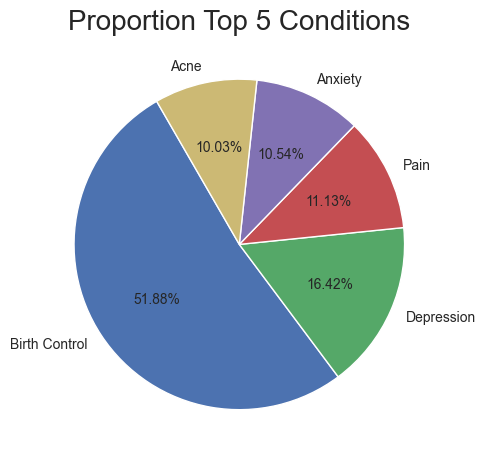

In [21]:
cond_5_ind=x['condition'].value_counts()[:5].index
cond_5_val=x['condition'].value_counts()[:5].values

sns.set_style(style="ticks")
fig= plt.figure(figsize=(5, 5))
plt.pie(cond_5_val, labels=cond_5_ind, autopct='%.2f%%', startangle=120, colors=sns.color_palette("deep6"))
plt.title('Proportion Top 5 Conditions', fontsize=20)
plt.tight_layout()
plt.show()

In [22]:
x.head()

condition                                             review
0   Weight Loss  "WARNING...... NEVER STOP THIS MEDICATION COLD...
3   Weight Loss  "I&#039;m a 5&#039;11 205lb size 12 former ath...
8          Acne  "Amazing! I understand when people say they tr...
9          ADHD  "I would have to say wow! It helped me focus d...
10      Anxiety  "I had taken this medicine in place of Xanax. ...

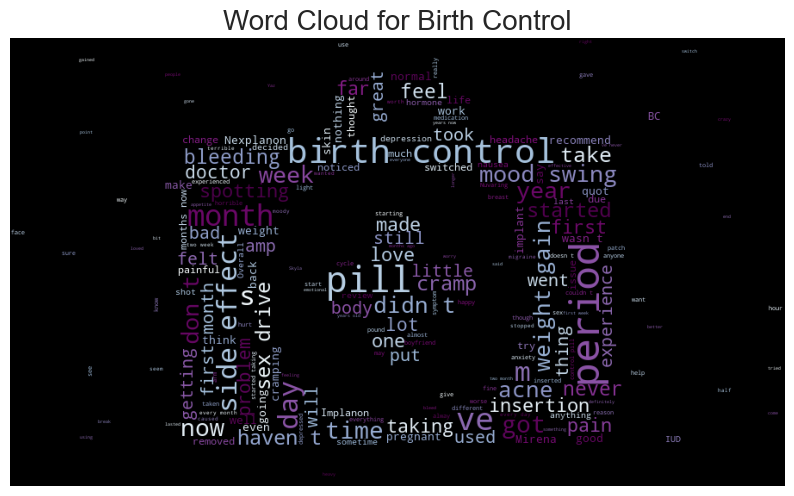

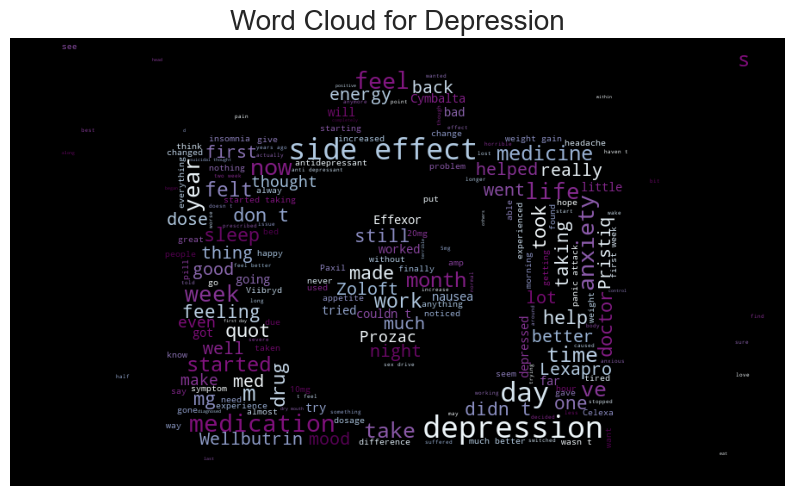

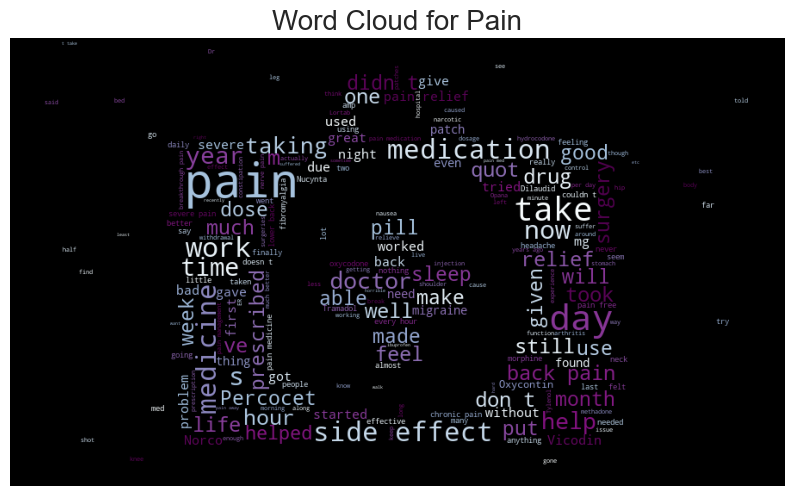

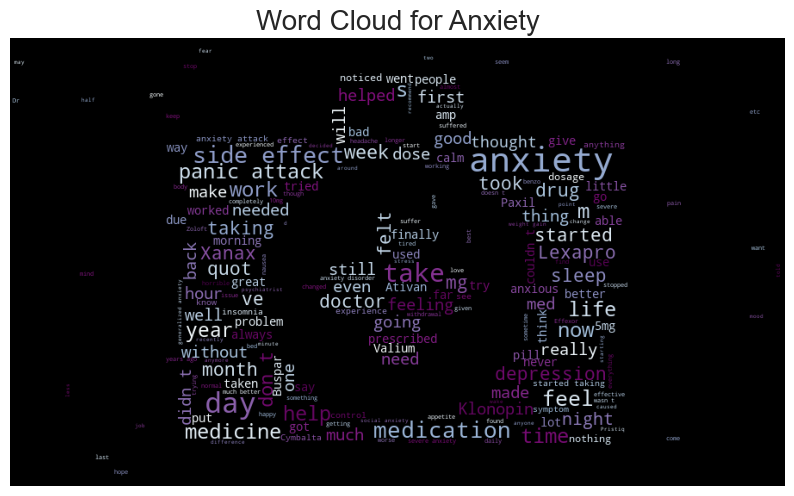

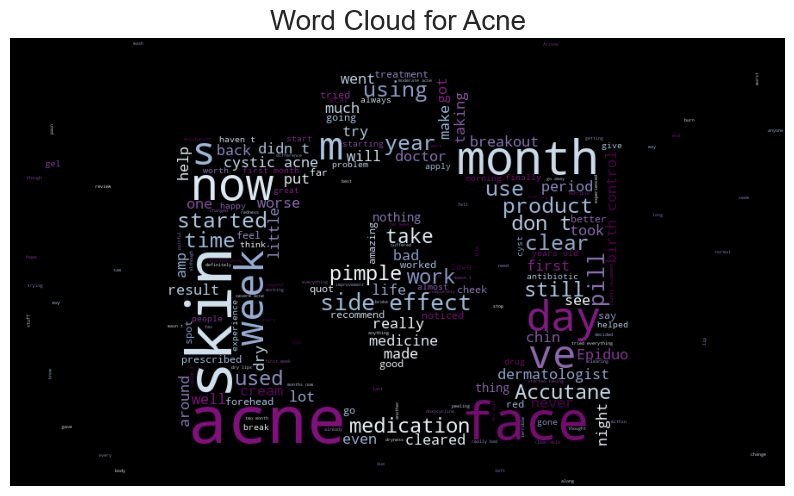

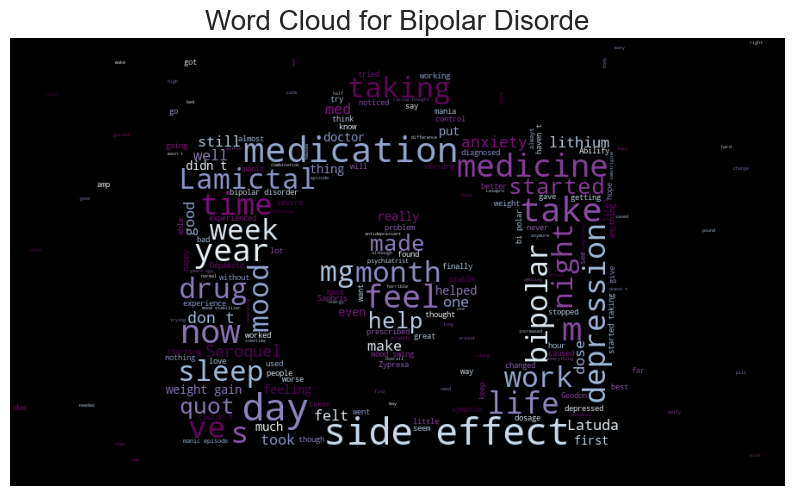

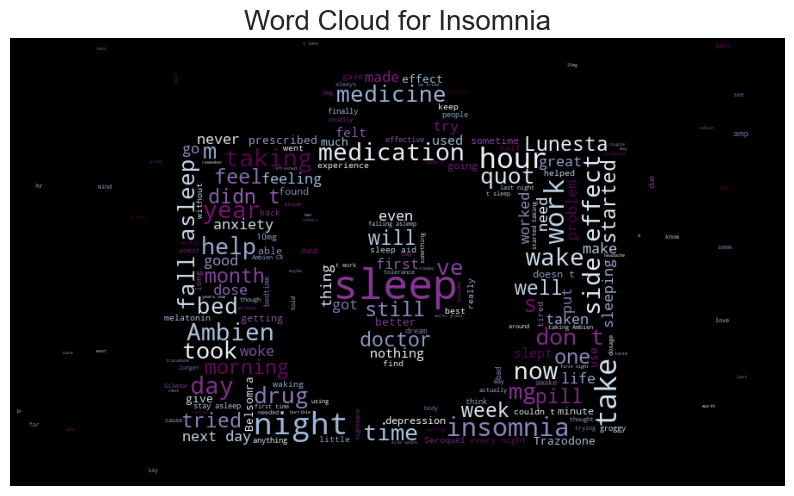

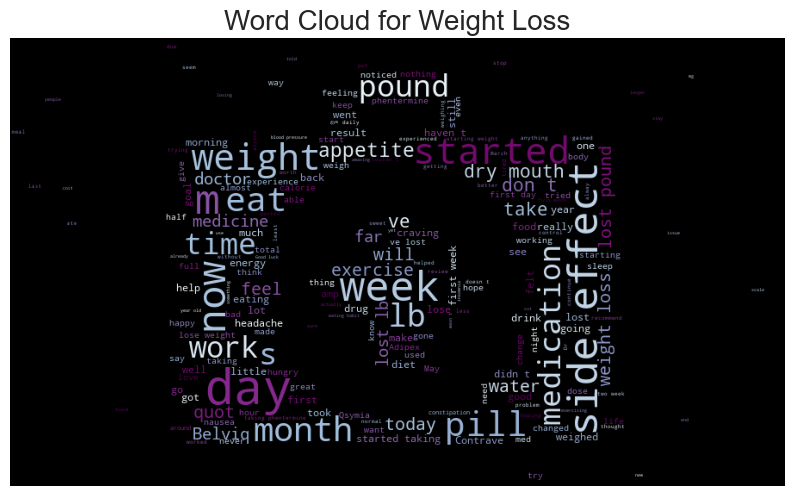

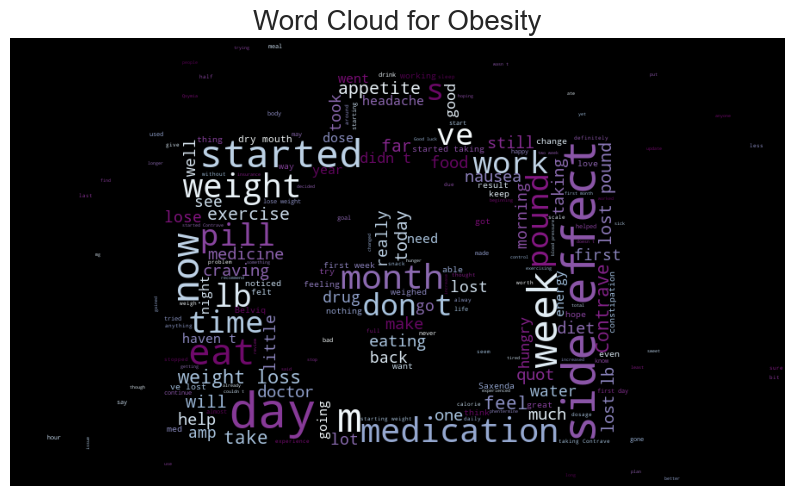

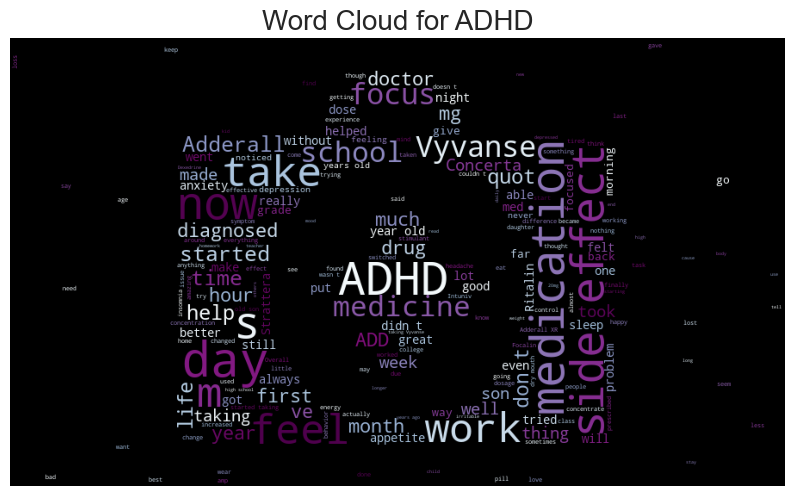

In [23]:
# Segregating dataframe for analyzing individual condition
from wordcloud import WordCloud
import PIL
from IPython.display import Image
img_mask = PIL.Image.open('./Med1.jpg')

img_mask = np.array(img_mask)
# display(img_mask)
for condition in valid_condition:
    plt.figure(figsize=(10,8))
    wc = WordCloud(max_words=200, 
                   colormap = 'BuPu_r', mask=img_mask, background_color='black').generate(' '.join(x[x['condition']==condition]['review']))
    plt.axis('off')
    plt.imshow(wc)
    plt.title(f"Word Cloud for {condition}",fontsize=20)

## Data Preprocessing

In [24]:
x[x['review'].str.contains('#')].reset_index(drop=True).loc[0,"review"]

'"WARNING...... NEVER STOP THIS MEDICATION COLD TURKEY.  The side effects are extreme! I was in Belviq for 4 months and began having side effects of nausea, headaches, and overall just a weird feeling. I stopped the medication to see if that&#039;s what the cause was. A few days later, I had severe muscle tremors and spasms, loss of coordination, sweating, shivering, shaking, headaches, and a rapid heart rate. I thought I was having a stroke. Went to the ER. My blood pressure was 210/150! Unfortunately, every time I would have a withdrawal from this medication I would experience these symptoms. It took 2 1/2 weeks to get this medication out of my body. I was confused a lot and had severe depression. I had all of the signs of serotonin syndrome."'

In [25]:
if '#' in x[x['review'].str.contains('#')].reset_index(drop=True).loc[0,"review"]:
    print("Yes")

Yes


In [26]:
for i, col in enumerate(x.columns):
    x.loc[:,col] = x.loc[:,col].str.replace('"','')
x[x['review'].str.contains('#')].reset_index(drop=True).loc[0,"review"]

'WARNING...... NEVER STOP THIS MEDICATION COLD TURKEY.  The side effects are extreme! I was in Belviq for 4 months and began having side effects of nausea, headaches, and overall just a weird feeling. I stopped the medication to see if that&#039;s what the cause was. A few days later, I had severe muscle tremors and spasms, loss of coordination, sweating, shivering, shaking, headaches, and a rapid heart rate. I thought I was having a stroke. Went to the ER. My blood pressure was 210/150! Unfortunately, every time I would have a withdrawal from this medication I would experience these symptoms. It took 2 1/2 weeks to get this medication out of my body. I was confused a lot and had severe depression. I had all of the signs of serotonin syndrome.'

In [27]:
# To set the width of the column to maximum
# pd.set_option('display.max_colwidth', -1)

In [28]:
x.head()

condition                                             review
0   Weight Loss  WARNING...... NEVER STOP THIS MEDICATION COLD ...
3   Weight Loss  I&#039;m a 5&#039;11 205lb size 12 former athl...
8          Acne  Amazing! I understand when people say they tri...
9          ADHD  I would have to say wow! It helped me focus du...
10      Anxiety  I had taken this medicine in place of Xanax.  ...

### Stopwords

What are stopwords?

Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document.

For example, in the English language, words like 'a', 'the', 'is', 'an', 'in', 'on', 'at', 'to', 'of', etc.

In [29]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
len(stopwords),stopwords

(179,
 ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
  'under',
  'again',
  'further',

### Lemmatization

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

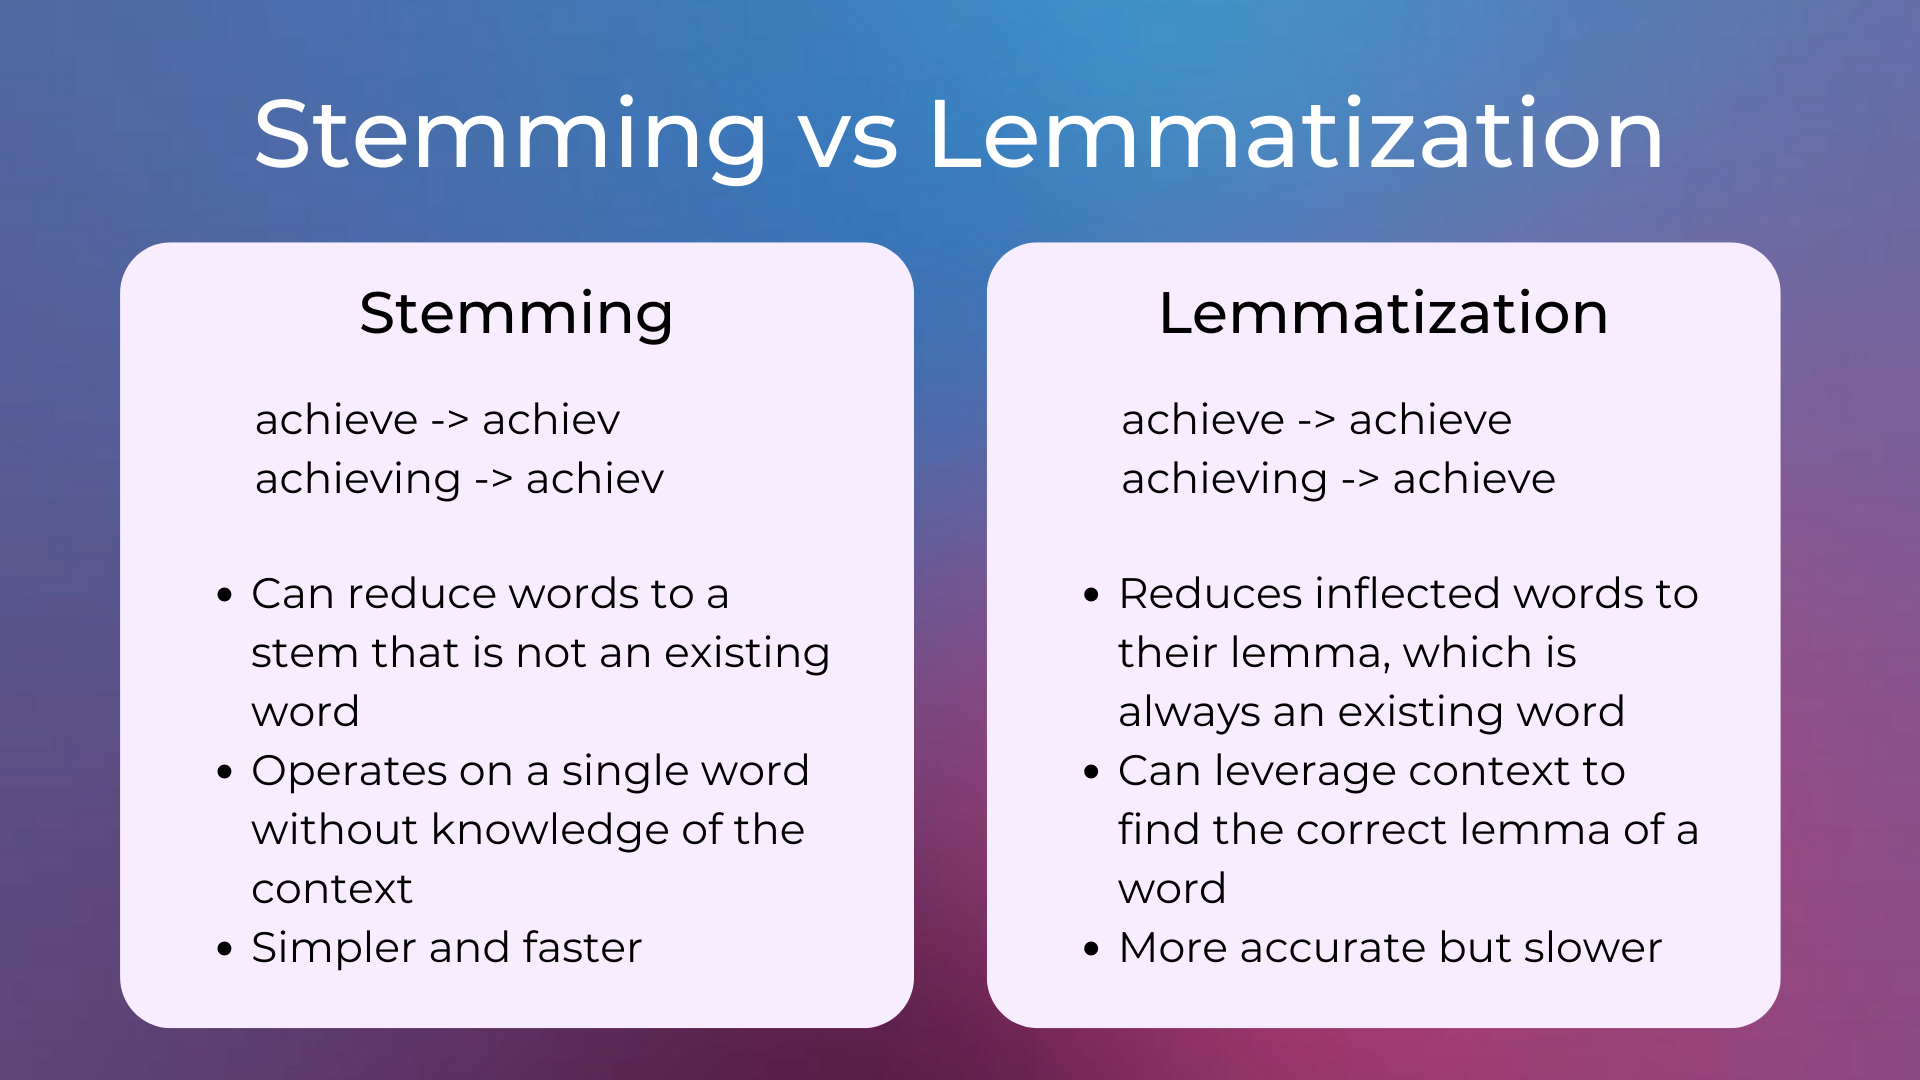

In [30]:
from IPython.display import Image, display
img=Image(filename='./stem_vs_lemma.png')
display(img)

In [31]:
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

lemmatizer = WordNetLemmatizer()

def get_tag(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith(('V','N','R')):
        return tag.lower()[0]
    else:
        return None
    
def lemmatize_word(words):
    pos = pos_tag(words)
    lemmatized_words = []
    for word, tag in pos:
        pos = get_tag(tag)
        if pos:
            lemmatized_words.append(lemmatizer.lemmatize(word,pos))
        else:
            lemmatized_words.append(word)
    return lemmatized_words

In [32]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
import string

punct = string.punctuation

In [33]:
def clean_words(raw_review):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review,'html.parser').get_text()
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    # 3. Convert words to lower case and tokenize them
    words = word_tokenize(review_text.lower())
    # 4. Remove Punctuation
    words = [word for word in words if word not in punct]
    # 5. Remove stopwords
    words = [w for w in words if w not in stopwords]
    # 6. Lemmatize words
    words = lemmatize_word(words)
    # 7. Join the words back into one string separated by space and return
    return " ".join(words)

In [34]:
x.head()
type(x.columns)

pandas.core.indexes.base.Index

In [36]:
data_clean = data.copy()
position = data_clean.columns.get_loc("review") + 1
data_clean.insert(position, "review_clean", None)
data_clean['review_clean'] = data_clean['review'].apply(clean_words)
data_clean=data_clean.drop(columns=['review',"Unnamed: 0"]).reset_index(drop=True)
data_clean.to_pickle("./drug review dataset drugs.com/DrugsComPatient_clean.pkl")

C:\Users\micha\AppData\Local\Temp\ipykernel_26360\376333685.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review,'html.parser').get_text()


In [ ]:
x.loc[:,'review_clean'] = x['review'].apply(clean_words)
x.head()

C:\Users\micha\AppData\Local\Temp\ipykernel_23520\376333685.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review,'html.parser').get_text()
C:\Users\micha\AppData\Local\Temp\ipykernel_23520\4086899686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,'review_clean'] = x['review'].apply(clean_words)


condition                                             review  \
0   Weight Loss  WARNING...... NEVER STOP THIS MEDICATION COLD ...   
3   Weight Loss  I&#039;m a 5&#039;11 205lb size 12 former athl...   
8          Acne  Amazing! I understand when people say they tri...   
9          ADHD  I would have to say wow! It helped me focus du...   
10      Anxiety  I had taken this medicine in place of Xanax.  ...   

                                         review_clean  
0   warn never stop medication cold turkey side ef...  
3   lb size former athlete current teacher coach w...  
8   amazing understand people say try everything s...  
9   would say wow help focus school use average st...  
10  take medicine place xanax find tranxene life s...

In [74]:
# review_text = "haha     jjjj    ksdkdk lsls"
    
# words = review_text.lower().split()
# words

## Creating Features and Target Variable

In [38]:
x

condition                                             review  \
0         Weight Loss  WARNING...... NEVER STOP THIS MEDICATION COLD ...   
3         Weight Loss  I&#039;m a 5&#039;11 205lb size 12 former athl...   
8                Acne  Amazing! I understand when people say they tri...   
9                ADHD  I would have to say wow! It helped me focus du...   
10            Anxiety  I had taken this medicine in place of Xanax.  ...   
...               ...                                                ...   
215055  Birth Control  I have been on it for three months and have ga...   
215057           Pain  I take two to three 325mg-5mg tablets daily fo...   
215058     Depression  I am extremely disheartened in reading the neg...   
215059    Weight Loss  I started Saxenda today at 184 pounds.  I am 5...   
215062        Anxiety  Being 32 and having cancer four times, I reali...   

                                             review_clean  
0       warn never stop medication cold turkey side ef...  
3       lb size former athlete current teacher coach w...  
8       amazing understand people say try everything s...  
9       would say wow help focus school use average st...  
10      take medicine place xanax find tranxene life s...  
...                                                   ...  
215055  three month gain pound regular gym schedule al...  
215057  take two three mg mg tablet daily chronic unex...  
215058  extremely disheartened read negative review ta...  
215059  start saxenda today pound year old goal weight...  
215062  cancer four time realize serious anxiety disor...  

[98723 rows x 3 columns]

In [39]:
x_feat=x['review_clean']
y=x['condition']
x_feat.shape,y.shape

((98723,), (98723,))

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)
print(y, len(le.classes_),le.classes_,le.inverse_transform(y))
joblib.dump(le,'./label_encoder.pkl')

[9 9 1 ... 5 9 2] 10 ['ADHD' 'Acne' 'Anxiety' 'Bipolar Disorde' 'Birth Control' 'Depression'
 'Insomnia' 'Obesity' 'Pain' 'Weight Loss'] ['Weight Loss' 'Weight Loss' 'Acne' ... 'Depression' 'Weight Loss'
 'Anxiety']


['./label_encoder.pkl']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x_feat,y,test_size=0.2,random_state=0,stratify=y)
if not os.path.exists("./Data"):
    os.mkdir("./Data")
joblib.dump(y_train, './Data/label_train.pkl')
joblib.dump(y_test, './Data/label_test.pkl')
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((78978,), (19745,), (78978,), (19745,))

## Bag of Words -> CountVectorizer

In [226]:
count_vectorizer = CountVectorizer(stop_words='english',analyzer='word')
len(count_vectorizer.get_stop_words()),count_vectorizer.get_stop_words()

(318,
 frozenset({'a',
            'about',
            'above',
            'across',
            'after',
            'afterwards',
            'again',
            'against',
            'all',
            'almost',
            'alone',
            'along',
            'already',
            'also',
            'although',
            'always',
            'am',
            'among',
            'amongst',
            'amoungst',
            'amount',
            'an',
            'and',
            'another',
            'any',
            'anyhow',
            'anyone',
            'anything',
            'anyway',
            'anywhere',
            'are',
            'around',
            'as',
            'at',
            'back',
            'be',
            'became',
            'because',
            'become',
            'becomes',
            'becoming',
            'been',
            'before',
            'beforehand',
            'behind',
            'being',
         

In [227]:
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

if not os.path.exists("./Data"):
    os.mkdir("./Data")
joblib.dump(count_train, './Data/count_train.pkl')
joblib.dump(count_test, './Data/count_test.pkl')

if not os.path.exists("./Bag of Words"):
    os.mkdir("./Bag of Words")
joblib.dump(count_vectorizer, "./Bag of Words/count_vectorizer.pkl")

['./Bag of Words/count_vectorizer.pkl']

In [228]:
print(count_train)

  (0, 17014)	1
  (0, 9221)	1
  (0, 15410)	1
  (0, 6357)	1
  (0, 12321)	1
  (0, 5316)	1
  (0, 22751)	1
  (0, 9200)	1
  (0, 8348)	1
  (0, 16918)	1
  (0, 9425)	1
  (0, 353)	1
  (1, 22751)	1
  (1, 12132)	1
  (1, 13842)	1
  (1, 10998)	3
  (1, 9146)	3
  (1, 23413)	2
  (1, 2235)	1
  (1, 4323)	1
  (1, 22199)	1
  (1, 3475)	1
  (1, 10091)	1
  (1, 17412)	1
  (1, 15638)	1
  :	:
  (78977, 22894)	1
  (78977, 19647)	1
  (78977, 8499)	1
  (78977, 2595)	1
  (78977, 1979)	1
  (78977, 8809)	2
  (78977, 19809)	1
  (78977, 14026)	1
  (78977, 4592)	1
  (78977, 20829)	1
  (78977, 5153)	1
  (78977, 14911)	1
  (78977, 20487)	1
  (78977, 20713)	1
  (78977, 2307)	2
  (78977, 3875)	1
  (78977, 2310)	1
  (78977, 16137)	1
  (78977, 9726)	1
  (78977, 4247)	1
  (78977, 19386)	1
  (78977, 7981)	1
  (78977, 13229)	2
  (78977, 15826)	1
  (78977, 16243)	1


## Modeling

In [ ]:
if not os.path.exists("./Models"):
    os.mkdir("./Models")

### Naive Bayes

[4 5 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.8740440617877944

Classification report:
              precision    recall  f1-score   support

           0      0.924     0.865     0.893       902
           1      0.922     0.886     0.903      1487
           2      0.764     0.692     0.726      1563
           3      0.834     0.755     0.793      1121
           4      0.960     0.974     0.967      7687
           5      0.743     0.810     0.775      2433
           6      0.830     0.866     0.848       981
           7      0.738     0.705     0.721       951
           8      0.928     0.918     0.923      1649
           9      0.721     0.765     0.742       971

    accuracy                          0.874     19745
   macro avg      0.836     0.823     0.829     19745
weighted avg      0.875     0.874     0.874     19745




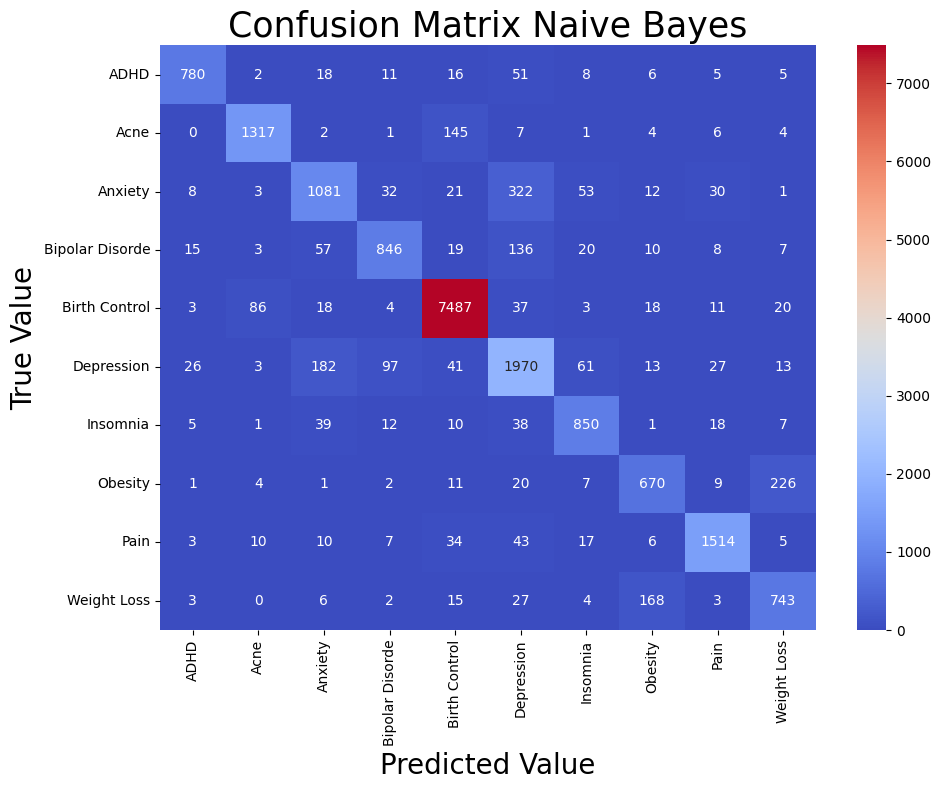

In [ ]:
mnb = MultinomialNB(alpha=0.1) # alpha is the smoothing parameter, a constant that is added to the frequency of each word
                               # to prevent zero probabilities
mnb.fit(count_train,y_train)
y_pred = mnb.predict(count_test)

joblib.dump(mnb,'./Models/mnb_countvec_model.pkl')

print(y_pred)
print(y_test)
print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")

print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix Naive Bayes",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

### K-Nearest Neighbors

[4 2 8 ... 4 4 6]
[4 2 8 ... 4 4 0]

Accuracy score: 0.8729805013927576

Classification report:
              precision    recall  f1-score   support

           0      0.934     0.765     0.841       902
           1      0.954     0.895     0.924      1487
           2      0.740     0.790     0.764      1563
           3      0.804     0.731     0.766      1121
           4      0.974     0.960     0.967      7687
           5      0.754     0.818     0.785      2433
           6      0.742     0.844     0.790       981
           7      0.807     0.768     0.787       951
           8      0.812     0.913     0.860      1649
           9      0.877     0.748     0.807       971

    accuracy                          0.873     19745
   macro avg      0.840     0.823     0.829     19745
weighted avg      0.877     0.873     0.874     19745




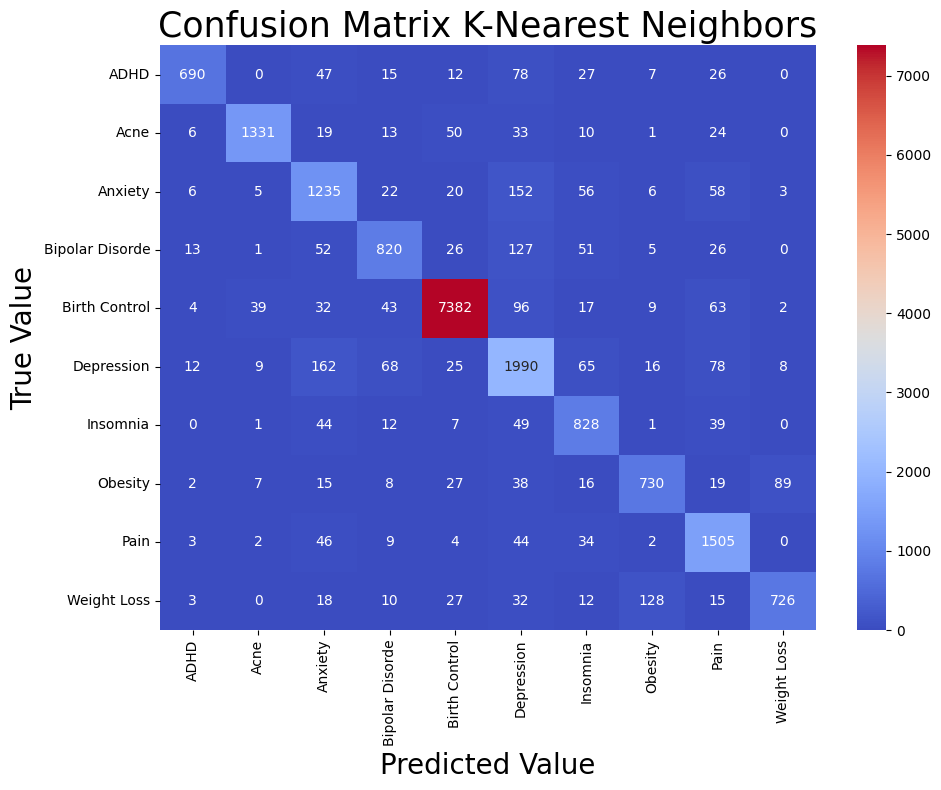

In [43]:
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', leaf_size=30, p=2)
knn.fit(count_train,y_train)
y_pred = knn.predict(count_test)

joblib.dump(knn, './Models/knn_w2v_model.pkl')

print(y_pred)
print(y_test)
print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix K-Nearest Neighbors",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

### Support Vector Machines

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9198278045074703

Classification report:
              precision    recall  f1-score   support

           0      0.894     0.933     0.913       902
           1      0.953     0.949     0.951      1487
           2      0.824     0.842     0.833      1563
           3      0.856     0.865     0.861      1121
           4      0.982     0.991     0.987      7687
           5      0.851     0.864     0.857      2433
           6      0.926     0.827     0.873       981
           7      0.820     0.809     0.814       951
           8      0.947     0.933     0.940      1649
           9      0.847     0.806     0.826       971

    accuracy                          0.920     19745
   macro avg      0.890     0.882     0.886     19745
weighted avg      0.920     0.920     0.920     19745




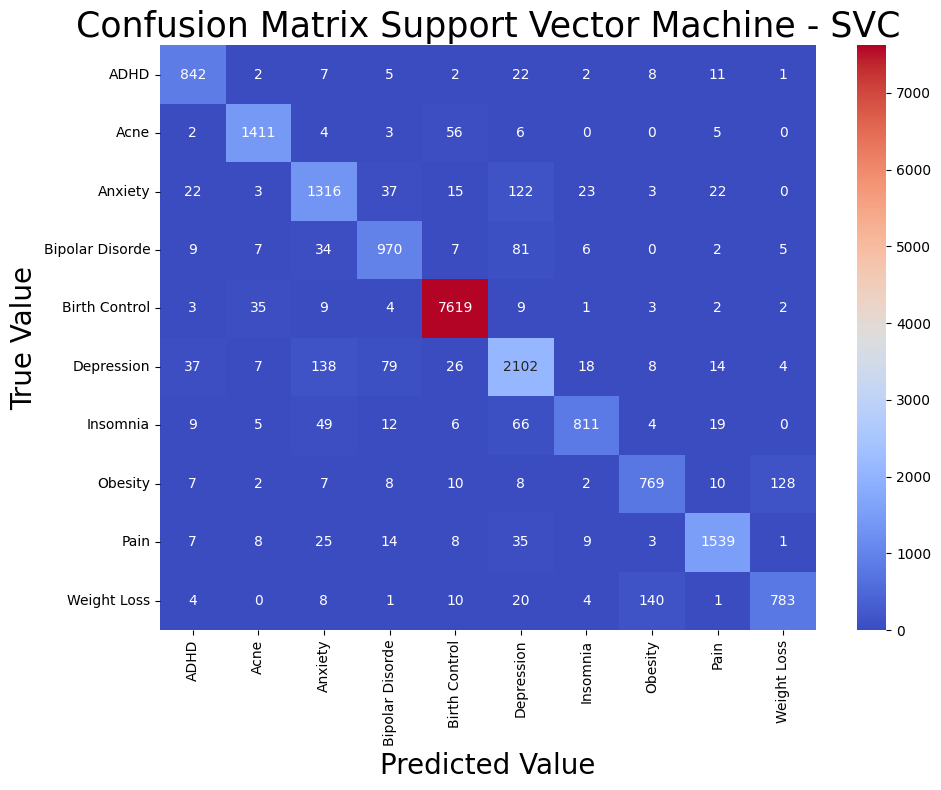

In [44]:
svc = SVC(kernel='linear', C=10)
svc.fit(count_train,y_train)
y_pred = svc.predict(count_test)

joblib.dump(svc,'./Models/svc_countvec_model.pkl')

print(y_pred)
print(y_test)
print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix Support Vector Machine - SVC",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

### Passive Aggresive Classifier

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]
Accuracy score: 0.8950113952899468

Classification report:
              precision    recall  f1-score   support

           0      0.914     0.926     0.920       902
           1      0.904     0.949     0.926      1487
           2      0.806     0.770     0.788      1563
           3      0.877     0.789     0.830      1121
           4      0.984     0.978     0.981      7687
           5      0.800     0.846     0.823      2433
           6      0.857     0.845     0.851       981
           7      0.651     0.857     0.740       951
           8      0.950     0.925     0.938      1649
           9      0.811     0.609     0.695       971

    accuracy                          0.895     19745
   macro avg      0.855     0.849     0.849     19745
weighted avg      0.898     0.895     0.895     19745




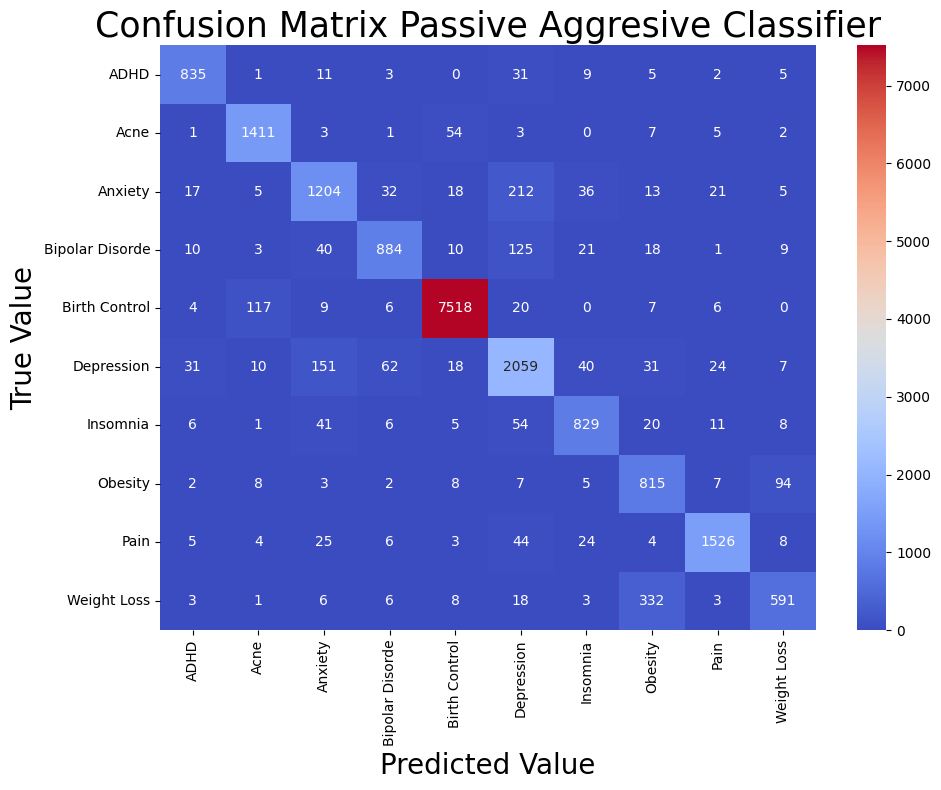

In [45]:
pac = PassiveAggressiveClassifier(max_iter=1000, C=0.1, random_state=0)
pac.fit(count_train,y_train)
y_pred = pac.predict(count_test)

joblib.dump(pac,'./Models/pac_countvec_model.pkl')

print(y_pred)
print(y_test)
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix Passive Aggresive Classifier",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

### Logistic Regression

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]
Accuracy score: 0.92084071916941

Classification report:
              precision    recall  f1-score   support

           0      0.947     0.928     0.937       902
           1      0.959     0.952     0.955      1487
           2      0.839     0.827     0.833      1563
           3      0.856     0.835     0.846      1121
           4      0.985     0.990     0.987      7687
           5      0.844     0.875     0.859      2433
           6      0.891     0.850     0.870       981
           7      0.827     0.809     0.818       951
           8      0.929     0.948     0.938      1649
           9      0.833     0.824     0.829       971

    accuracy                          0.921     19745
   macro avg      0.891     0.884     0.887     19745
weighted avg      0.921     0.921     0.921     19745




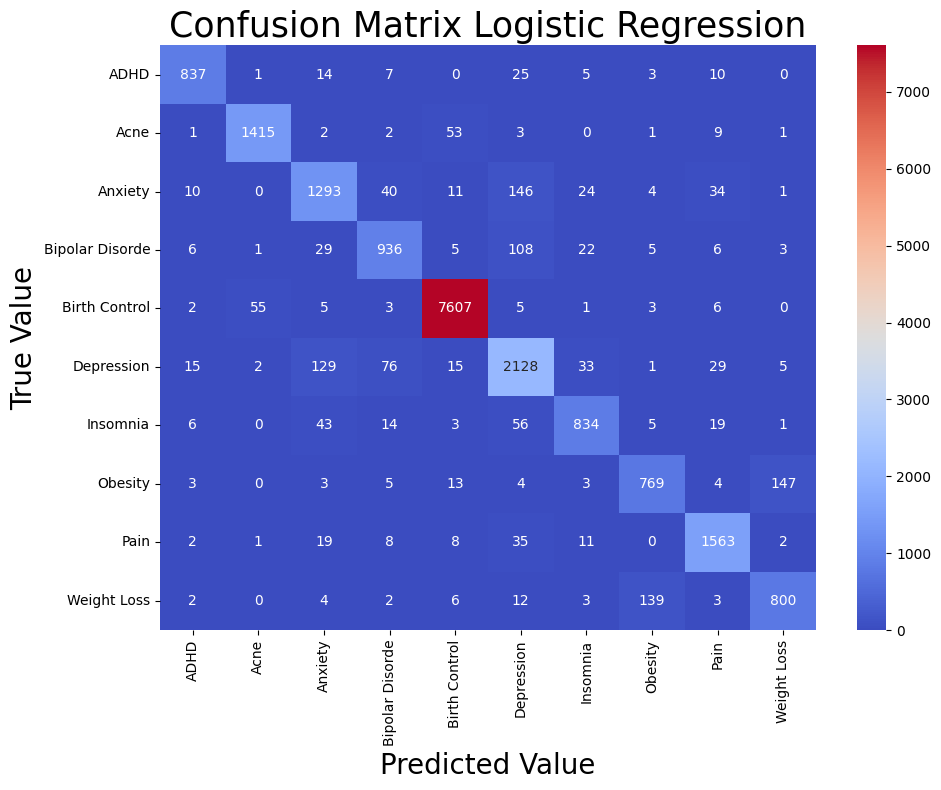

In [46]:
lr = LogisticRegression(max_iter=1000, C=10)
lr.fit(count_train,y_train)
y_pred = lr.predict(count_test)

joblib.dump(lr,'./Models/lr_countvec_model.pkl')

print(y_pred)
print(y_test)
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix Logistic Regression",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

### Random Forest

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]
Accuracy score: 0.9277285388706001

Classification report:
              precision    recall  f1-score   support

           0      0.972     0.914     0.942       902
           1      0.980     0.946     0.962      1487
           2      0.876     0.830     0.853      1563
           3      0.929     0.838     0.881      1121
           4      0.968     0.996     0.982      7687
           5      0.846     0.910     0.877      2433
           6      0.899     0.873     0.886       981
           7      0.874     0.779     0.824       951
           8      0.935     0.944     0.939      1649
           9      0.848     0.849     0.848       971

    accuracy                          0.928     19745
   macro avg      0.913     0.888     0.899     19745
weighted avg      0.928     0.928     0.927     19745




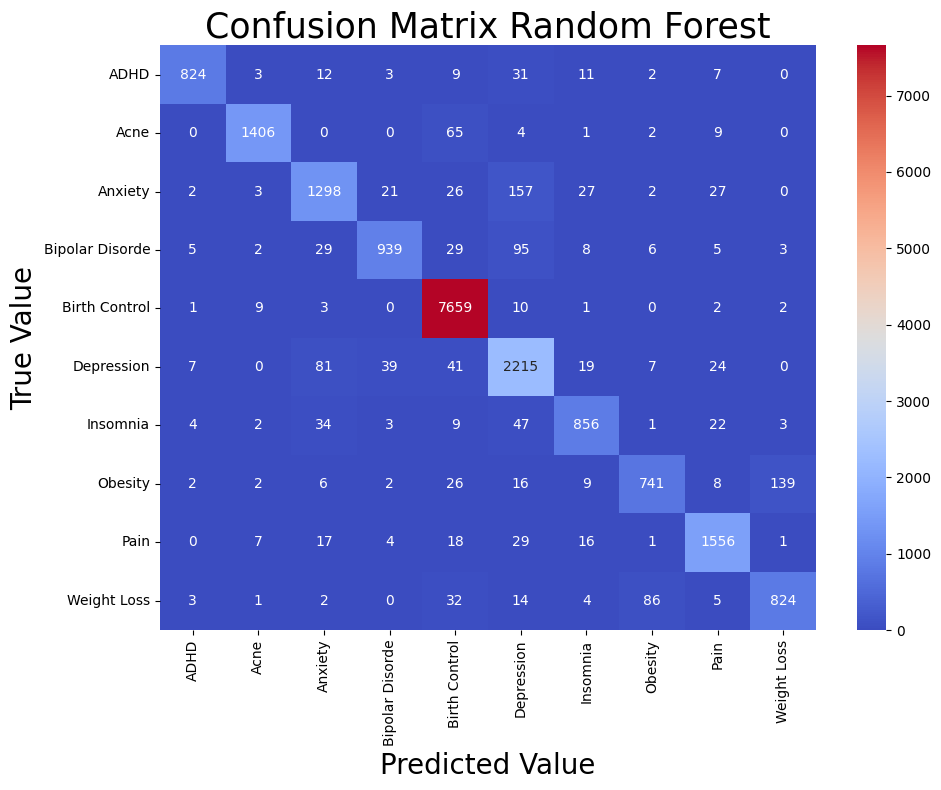

In [47]:
rf = RandomForestClassifier(n_estimators=50,random_state=0) # 50 n_estimators in order to fasten the process
rf.fit(count_train,y_train)
y_pred = rf.predict(count_test)

joblib.dump(rf,'./Models/rf_countvec_model.pkl')

print(y_pred)
print(y_test)
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix Random Forest",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

### XGBoost

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9373512281590276

Classification report:
              precision    recall  f1-score   support

           0      0.957     0.939     0.948       902
           1      0.984     0.958     0.971      1487
           2      0.880     0.850     0.865      1563
           3      0.921     0.879     0.899      1121
           4      0.988     0.994     0.991      7687
           5      0.852     0.913     0.882      2433
           6      0.922     0.880     0.900       981
           7      0.880     0.826     0.852       951
           8      0.930     0.955     0.942      1649
           9      0.859     0.863     0.861       971

    accuracy                          0.937     19745
   macro avg      0.917     0.906     0.911     19745
weighted avg      0.938     0.937     0.937     19745




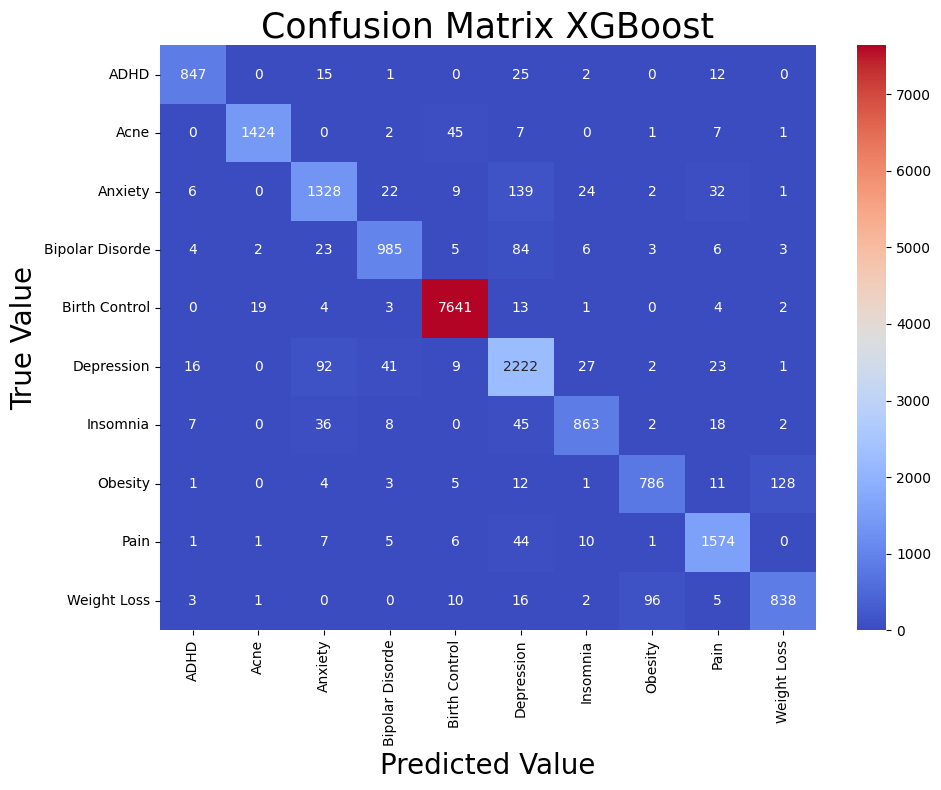

In [48]:
xgb = xgboost.XGBClassifier(n_estimators=1000,objective='multi:softmax')
xgb.fit(count_train,y_train)
y_pred = xgb.predict(count_test)

joblib.dump(xgb,'./Models/xgb_countvec_model.pkl')

print(y_pred)
print(y_test)
print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
print("=====================================================\n")
cm =confusion_matrix(y_test,y_pred,labels=range(len(le.classes_)))
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix XGBoost",fontsize=25)
plt.xlabel("Predicted Value",fontsize=20)
plt.ylabel("True Value",fontsize=20)
plt.tight_layout()

In [49]:
xgb.get_params(),xgb.n_estimators

({'objective': 'multi:softmax',
  'base_score': None,
  'booster': None,
  'callbacks': None,
  'colsample_bylevel': None,
  'colsample_bynode': None,
  'colsample_bytree': None,
  'device': None,
  'early_stopping_rounds': None,
  'enable_categorical': False,
  'eval_metric': None,
  'feature_types': None,
  'gamma': None,
  'grow_policy': None,
  'importance_type': None,
  'interaction_constraints': None,
  'learning_rate': None,
  'max_bin': None,
  'max_cat_threshold': None,
  'max_cat_to_onehot': None,
  'max_delta_step': None,
  'max_depth': None,
  'max_leaves': None,
  'min_child_weight': None,
  'missing': nan,
  'monotone_constraints': None,
  'multi_strategy': None,
  'n_estimators': 1000,
  'n_jobs': None,
  'num_parallel_tree': None,
  'random_state': None,
  'reg_alpha': None,
  'reg_lambda': None,
  'sampling_method': None,
  'scale_pos_weight': None,
  'subsample': None,
  'tree_method': None,
  'validate_parameters': None,
  'verbosity': None},
 1000)

## Bag of Words -> TFIDFVectorizer

In [229]:
List_gram=[]

In [230]:
from nltk.tokenize import word_tokenize
tfidf_vectorizer_unigram = TfidfVectorizer(tokenizer=word_tokenize,stop_words='english',token_pattern=None,ngram_range=(1,1))
len(tfidf_vectorizer_unigram.get_stop_words()), tfidf_vectorizer_unigram.get_stop_words()

(318,
 frozenset({'a',
            'about',
            'above',
            'across',
            'after',
            'afterwards',
            'again',
            'against',
            'all',
            'almost',
            'alone',
            'along',
            'already',
            'also',
            'although',
            'always',
            'am',
            'among',
            'amongst',
            'amoungst',
            'amount',
            'an',
            'and',
            'another',
            'any',
            'anyhow',
            'anyone',
            'anything',
            'anyway',
            'anywhere',
            'are',
            'around',
            'as',
            'at',
            'back',
            'be',
            'became',
            'because',
            'become',
            'becomes',
            'becoming',
            'been',
            'before',
            'beforehand',
            'behind',
            'being',
         

In [231]:
tfidf_train_unigram = tfidf_vectorizer_unigram.fit_transform(x_train)
tfidf_test_unigram = tfidf_vectorizer_unigram.transform(x_test)

if not os.path.exists("./Data"):
    os.mkdir("./Data")
joblib.dump(tfidf_train_unigram, './Data/tfidf_train_unigram.pkl')
joblib.dump(tfidf_test_unigram, './Data/tfidf_test_unigram.pkl')

if not os.path.exists("./Bag of Words"):
    os.mkdir("./Bag of Words")
joblib.dump(tfidf_vectorizer_unigram,'./Bag of Words/tfidf_vectorizer_(1,1)-gram_unigram.pkl')
List_gram.append(("TFIDF (1,1)-gram_Unigram",tfidf_train_unigram,tfidf_test_unigram,"(1,1)-gram_unigram"))

In [232]:
print(tfidf_train_unigram)

  (0, 353)	0.32262182254083566
  (0, 9432)	0.17528087578014412
  (0, 16933)	0.4185839508239777
  (0, 8353)	0.32527210287994063
  (0, 9207)	0.42958808188477193
  (0, 22770)	0.21559496842208406
  (0, 5319)	0.3034413475220974
  (0, 12332)	0.1668099863454125
  (0, 6360)	0.23295170897860645
  (0, 15423)	0.29339474631060314
  (0, 9228)	0.24065758072261798
  (0, 17029)	0.18704258587794018
  (1, 11590)	0.22012772293878954
  (1, 12110)	0.05977209722143863
  (1, 1666)	0.07032360657872852
  (1, 6171)	0.07238463937393091
  (1, 6091)	0.05524017546961605
  (1, 15724)	0.09753841496007458
  (1, 19200)	0.22012772293878954
  (1, 14931)	0.05690022786243669
  (1, 7437)	0.05767745998149057
  (1, 17808)	0.07682146072836729
  (1, 11537)	0.08296877661480125
  (1, 22881)	0.0434070194819473
  (1, 13281)	0.038129547802885376
  :	:
  (78977, 4249)	0.16688262217555136
  (78977, 9733)	0.2038418237336426
  (78977, 16150)	0.1571156873797492
  (78977, 2311)	0.17050492614634835
  (78977, 3877)	0.20608683414359386
  (78

## TFIDFVectorizer: (1,2)-gram

In [233]:
from nltk.tokenize import word_tokenize
tfidf_vectorizer_ubigram = TfidfVectorizer(tokenizer=word_tokenize,stop_words='english',token_pattern=None, ngram_range=(1,2))

In [234]:
tfidf_train_ubigram = tfidf_vectorizer_ubigram.fit_transform(x_train)
tfidf_test_ubigram = tfidf_vectorizer_ubigram.transform(x_test)

if not os.path.exists("./Data"):
    os.mkdir("./Data")
joblib.dump(tfidf_train_ubigram, './Data/tfidf_train_ubigram.pkl')
joblib.dump(tfidf_test_ubigram, './Data/tfidf_test_ubigram.pkl')

if not os.path.exists("./Bag of Words"):
    os.mkdir("./Bag of Words")
joblib.dump(tfidf_vectorizer_ubigram,'./Bag of Words/tfidf_vectorizer_(1,2)-gram.pkl')
List_gram.append(("TFIDF (1,2)-Gram",tfidf_train_ubigram,tfidf_test_ubigram,"(1,2)-gram"))

In [235]:
print(tfidf_train_ubigram)

  (0, 234393)	0.25347045135303437
  (0, 427484)	0.32992035438950973
  (0, 207149)	0.32992035438950973
  (0, 225235)	0.27248819287447656
  (0, 575561)	0.3049129574175971
  (0, 128801)	0.26734227599026006
  (0, 313805)	0.21164675020970972
  (0, 154361)	0.2100792512853906
  (0, 392595)	0.2974955898463892
  (0, 226992)	0.2148559336940117
  (0, 432313)	0.2148559336940117
  (0, 9711)	0.1477054248611861
  (0, 234360)	0.08024855858555559
  (0, 427440)	0.1916396101466562
  (0, 206881)	0.14891879840301833
  (0, 225201)	0.19667761359218275
  (0, 575121)	0.09870549412288196
  (0, 128343)	0.13892405914522152
  (0, 313483)	0.07637034503801791
  (0, 153700)	0.1066519024529695
  (0, 392461)	0.13432444003493385
  (0, 226435)	0.11017986919406299
  (0, 431865)	0.08563340321077983
  (1, 285953)	0.12767201492791833
  (1, 305819)	0.12767201492791833
  :	:
  (78977, 341718)	0.0910744868844888
  (78977, 56729)	0.0832008502878118
  (78977, 89249)	0.10056366241965893
  (78977, 55848)	0.12364426185705606
  (7897

## TFIDFVectorizer: (1,3)-gram

In [236]:
# from nltk.tokenize import word_tokenize
# tfidf_vectorizer_ubitrigram = TfidfVectorizer(tokenizer=word_tokenize,stop_words='english',token_pattern=None, ngram_range=(1,3))

In [237]:
# tfidf_train_ubitrigram = tfidf_vectorizer_ubitrigram.fit_transform(x_train)
# tfidf_test_ubitrigram = tfidf_vectorizer_ubitrigram.transform(x_test)

# if not os.path.exists("./Bag of Words"):
#     os.mkdir("./Bag of Words")
# joblib.dump(tfidf_vectorizer_ubitrigram,'./Bag of Words/tfidf_vectorizer_(1,3)-gram.pkl')
# List_gram.append(("TFIDF (1,3)-Gram",tfidf_train_ubitrigram,tfidf_test_ubitrigram,"(1,3)-gram"))

In [238]:
# print(tfidf_train_ubitrigram)

### Naive Bayes

TFIDF (1,1)-gram_Unigram

[4 5 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.8590022790579893

Classification report:
              precision    recall  f1-score   support

           0      0.959     0.814     0.881       902
           1      0.960     0.834     0.892      1487
           2      0.792     0.615     0.692      1563
           3      0.906     0.641     0.751      1121
           4      0.910     0.992     0.949      7687
           5      0.666     0.873     0.756      2433
           6      0.907     0.766     0.830       981
           7      0.794     0.660     0.721       951
           8      0.943     0.890     0.916      1649
           9      0.759     0.736     0.748       971

    accuracy                          0.859     19745
   macro avg      0.860     0.782     0.814     19745
weighted avg      0.866     0.859     0.857     19745


TFIDF (1,2)-Gram

[4 2 8 ... 4 4 5]
[4 2 8 ... 4 4 0]

Accuracy score: 0.8997214484679665

Classification report:
    

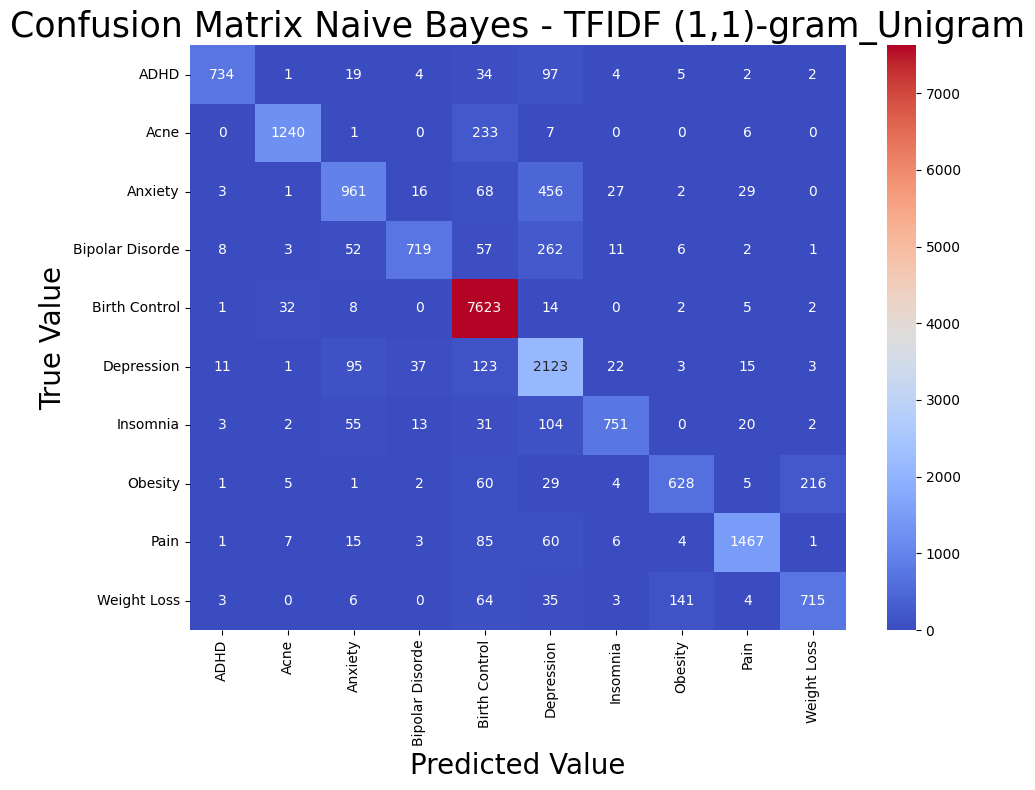

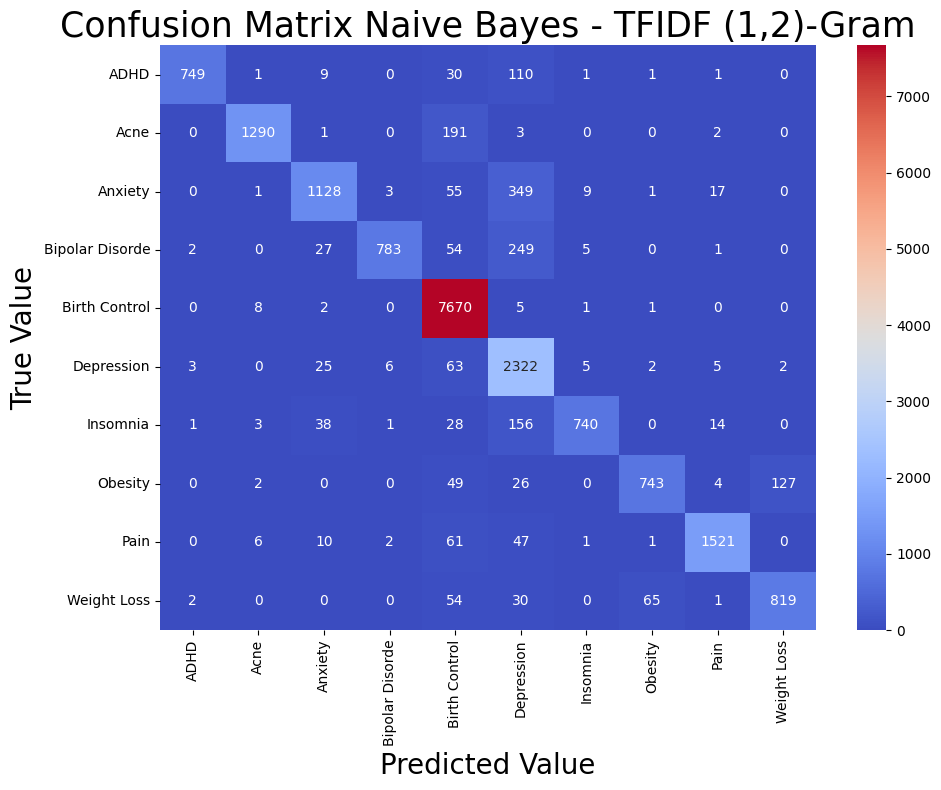

In [60]:
mnb_model=[]
for name, x_tr, x_ts, modname in List_gram:
    print(f"{name}\n")
    mnb = MultinomialNB(alpha=0.1)
    mnb.fit(x_tr,y_train)
    y_pred = mnb.predict(x_ts)

    joblib.dump(mnb,f'./Models/mnb_tfidf_{modname}_model.pkl')

    print(y_pred)
    print(y_test)
    print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
    
    print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
    print("=====================================================\n")
    
    cm =confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
    plt.title(f"Confusion Matrix Naive Bayes - {name}",fontsize=25)
    plt.xlabel("Predicted Value",fontsize=20)
    plt.ylabel("True Value",fontsize=20)
    plt.tight_layout()
    mnb_model.append(mnb) # 0 : Unigram (1,1), 1 : Unigram-Bigram (1,2)

### K-Nearest Neighbors

TFIDF (1,1)-gram_Unigram

[4 2 8 ... 4 4 5]
[4 2 8 ... 4 4 0]

Accuracy score: 0.8929855659660674

Classification report:
              precision    recall  f1-score   support

           0      0.982     0.845     0.908       902
           1      0.931     0.946     0.938      1487
           2      0.889     0.728     0.801      1563
           3      0.965     0.767     0.855      1121
           4      0.991     0.962     0.976      7687
           5      0.637     0.933     0.757      2433
           6      0.812     0.855     0.833       981
           7      0.924     0.752     0.829       951
           8      0.920     0.911     0.915      1649
           9      0.906     0.765     0.830       971

    accuracy                          0.893     19745
   macro avg      0.896     0.846     0.864     19745
weighted avg      0.911     0.893     0.896     19745


TFIDF (1,2)-Gram

[4 2 8 ... 4 4 5]
[4 2 8 ... 4 4 0]

Accuracy score: 0.8576348442643708

Classification report:
    

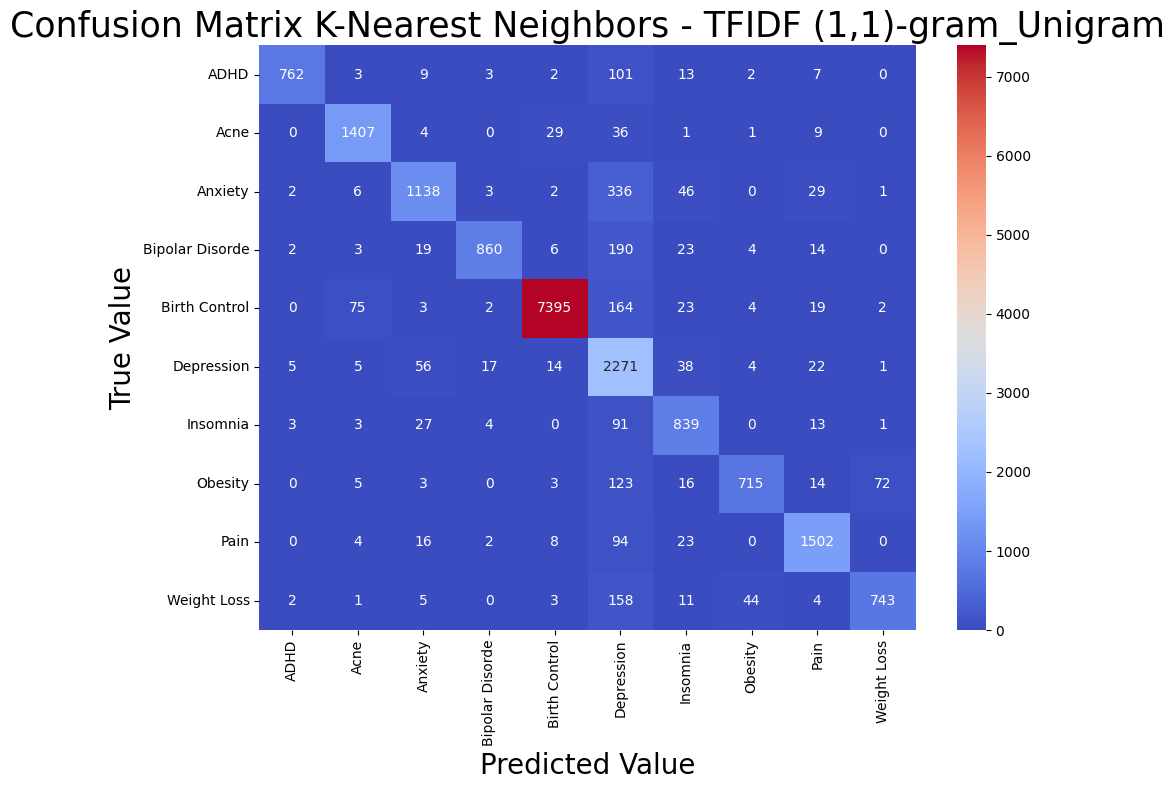

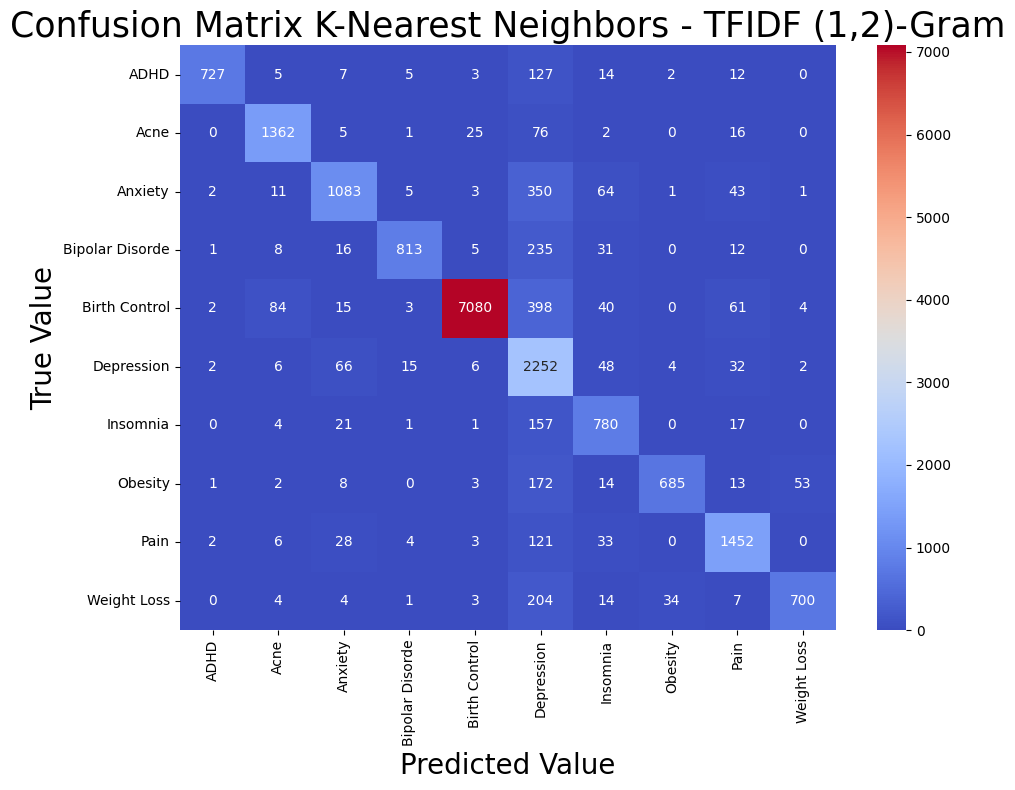

In [61]:
knn_model=[]
for name, x_tr, x_ts, modname in List_gram:
    print(f"{name}\n")
    knn = KNeighborsClassifier(n_neighbors=15, weights='distance', leaf_size=30, p=2)
    knn.fit(x_tr,y_train)
    y_pred = knn.predict(x_ts)

    joblib.dump(knn,f'./Models/knn_tfidf_{modname}_model.pkl')

    print(y_pred)
    print(y_test)
    print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
    
    print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
    print("=====================================================\n")
    
    cm =confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
    plt.title(f"Confusion Matrix K-Nearest Neighbors - {name}",fontsize=25)
    plt.xlabel("Predicted Value",fontsize=20)
    plt.ylabel("True Value",fontsize=20)
    plt.tight_layout()
    knn_model.append(knn) # 0 : Unigram (1,1), 1 : Unigram-Bigram (1,2)

### Support Vector Machines

TFIDF (1,1)-gram_Unigram

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9157761458597113

Classification report:
              precision    recall  f1-score   support

           0      0.931     0.938     0.934       902
           1      0.954     0.935     0.945      1487
           2      0.817     0.828     0.823      1563
           3      0.862     0.847     0.855      1121
           4      0.981     0.989     0.985      7687
           5      0.837     0.865     0.851      2433
           6      0.906     0.851     0.878       981
           7      0.800     0.780     0.790       951
           8      0.947     0.940     0.944      1649
           9      0.816     0.790     0.803       971

    accuracy                          0.916     19745
   macro avg      0.885     0.876     0.881     19745
weighted avg      0.916     0.916     0.916     19745


TFIDF (1,2)-Gram

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9422132185363383

Classification report:
    

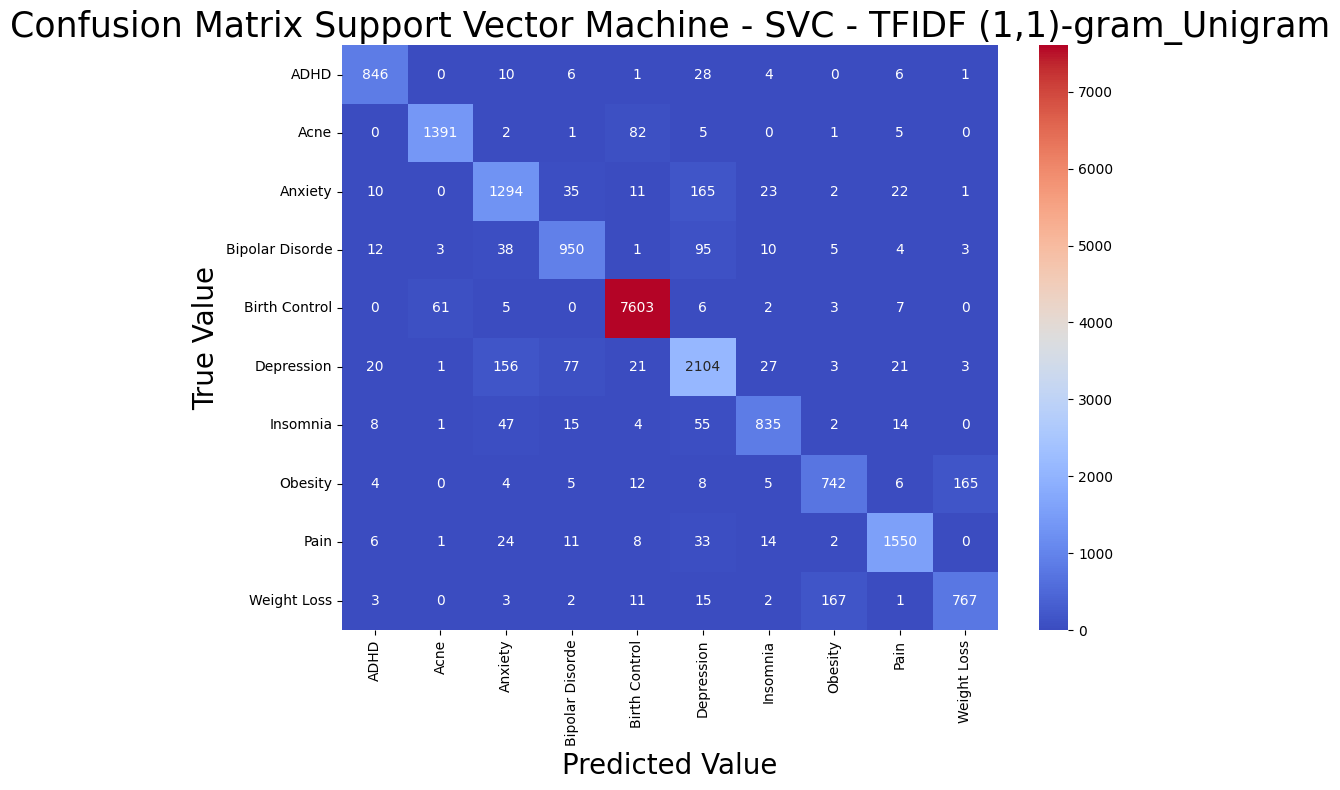

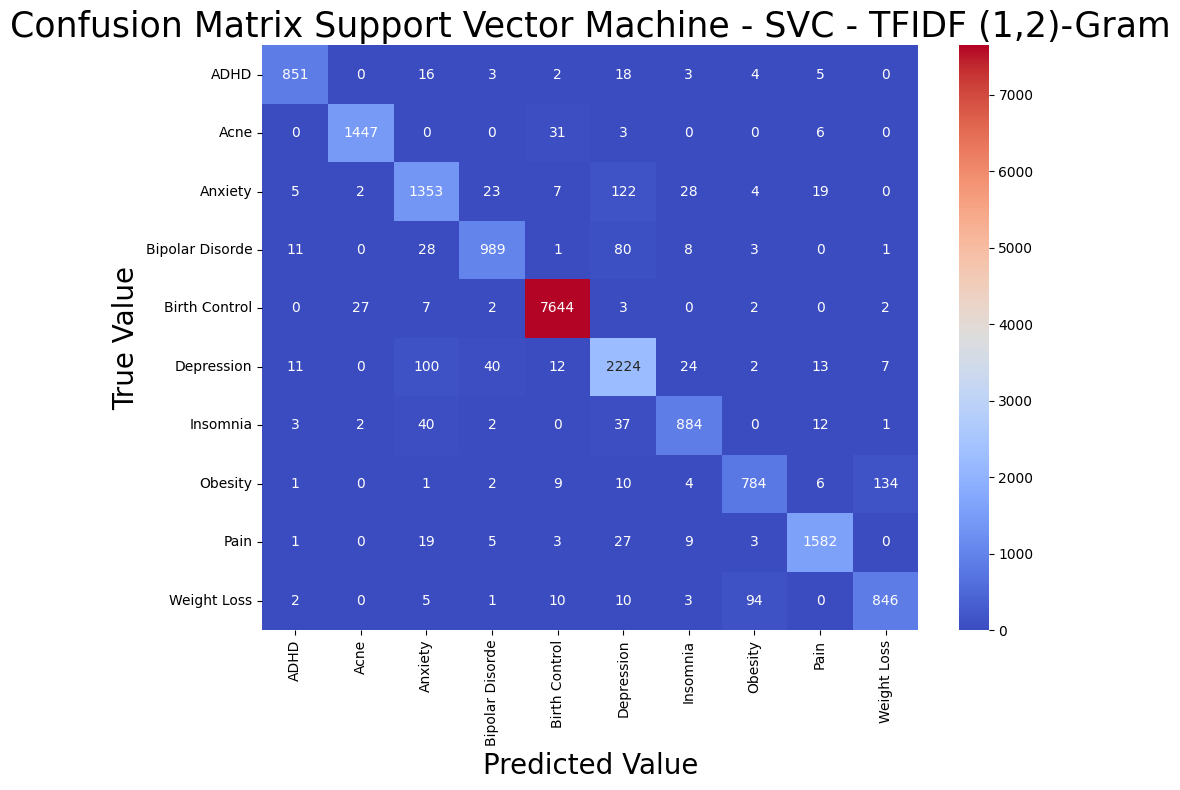

In [62]:
svc_model=[]
for name, x_tr, x_ts, modname in List_gram:
    print(f"{name}\n")
    svc = SVC(kernel='linear', C=10)
    svc.fit(x_tr,y_train)
    y_pred = svc.predict(x_ts)

    joblib.dump(svc,f'./Models/svc_tfidf_{modname}_model.pkl')

    print(y_pred)
    print(y_test)
    print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
    
    print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
    print("=====================================================\n")
    
    cm =confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
    plt.title(f"Confusion Matrix Support Vector Machine - SVC - {name}",fontsize=25)
    plt.xlabel("Predicted Value",fontsize=20)
    plt.ylabel("True Value",fontsize=20)
    plt.tight_layout()
    svc_model.append(svc) # 0 : Unigram (1,1), 1 : Unigram-Bigram (1,2)

### Passive Aggresive Classifier

TFIDF (1,1)-gram_Unigram

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.8970878703469233

Classification report:
              precision    recall  f1-score   support

           0      0.940     0.900     0.920       902
           1      0.942     0.900     0.921      1487
           2      0.790     0.766     0.778      1563
           3      0.852     0.808     0.830      1121
           4      0.971     0.988     0.979      7687
           5      0.813     0.841     0.826      2433
           6      0.847     0.879     0.862       981
           7      0.766     0.710     0.737       951
           8      0.931     0.942     0.937      1649
           9      0.748     0.752     0.750       971

    accuracy                          0.897     19745
   macro avg      0.860     0.849     0.854     19745
weighted avg      0.896     0.897     0.897     19745


TFIDF (1,2)-Gram

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9445429222587997

Classification report:
    

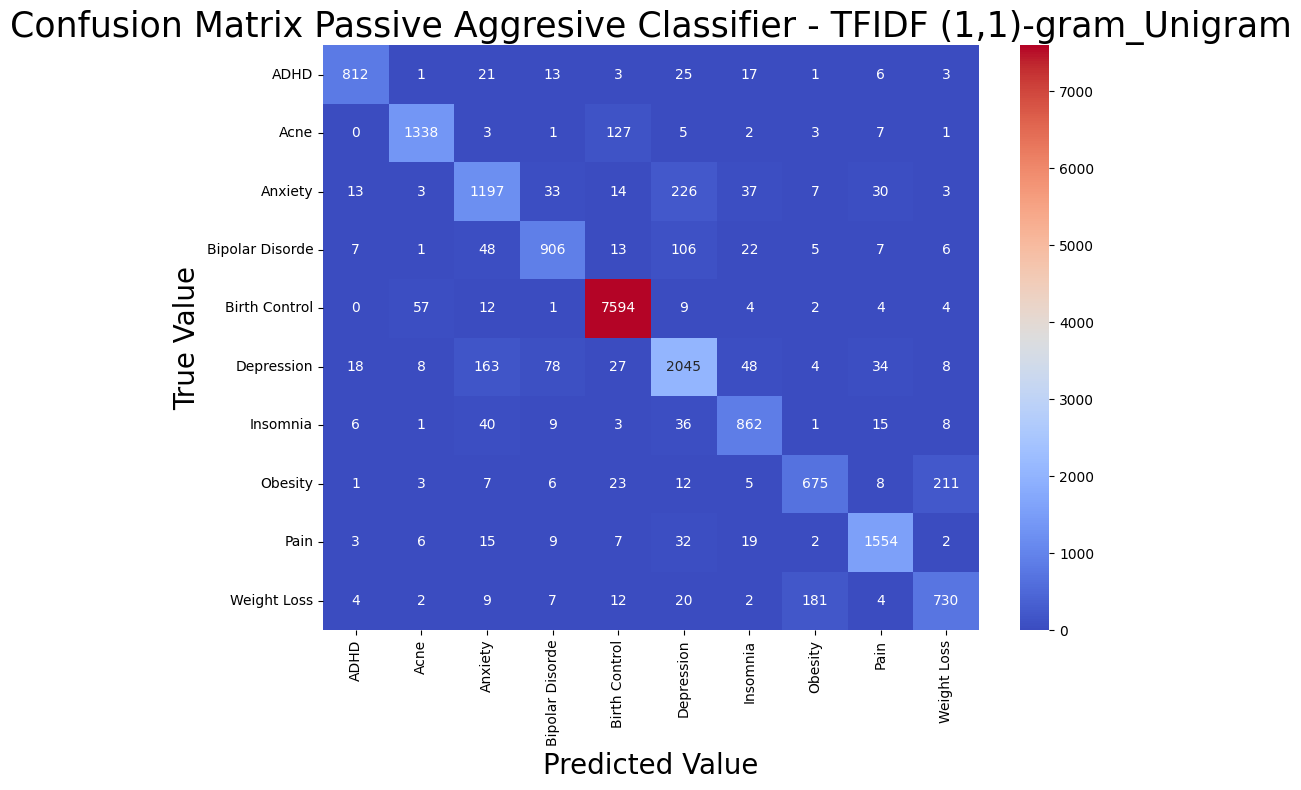

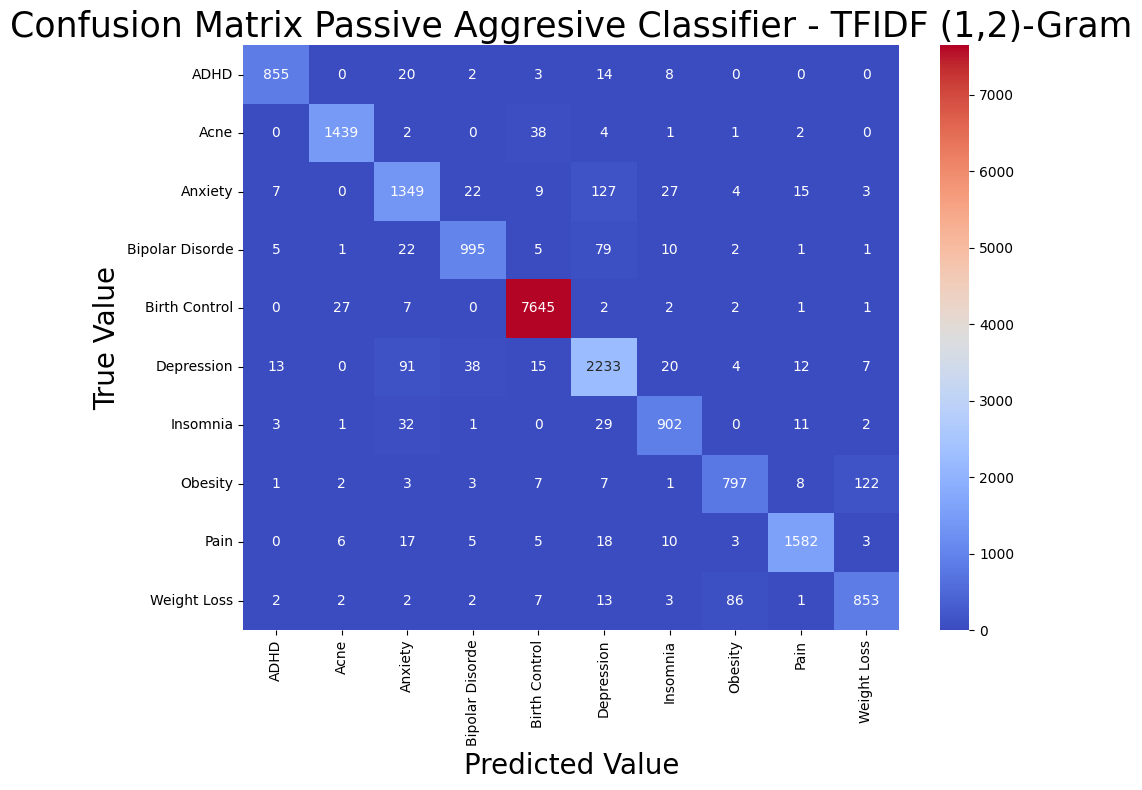

In [63]:
pac_model=[]
for name, x_tr, x_ts, modname in List_gram:
    print(f"{name}\n")
    pac = PassiveAggressiveClassifier(max_iter=1000, C=0.1, random_state=0)
    pac.fit(x_tr,y_train)
    y_pred = pac.predict(x_ts)

    joblib.dump(pac,f'./Models/pac_tfidf_{modname}_model.pkl')

    print(y_pred)
    print(y_test)
    print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
    
    print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
    print("=====================================================\n")
    
    cm =confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
    plt.title(f"Confusion Matrix Passive Aggresive Classifier - {name}",fontsize=25)
    plt.xlabel("Predicted Value",fontsize=20)
    plt.ylabel("True Value",fontsize=20)
    plt.tight_layout()
    pac_model.append(pac) # 0 : Unigram (1,1), 1 : Unigram-Bigram (1,2)

### Logistic Regression

TFIDF (1,1)-gram_Unigram

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9109648012154976

Classification report:
              precision    recall  f1-score   support

           0      0.946     0.924     0.934       902
           1      0.955     0.919     0.937      1487
           2      0.817     0.790     0.804      1563
           3      0.873     0.822     0.847      1121
           4      0.977     0.989     0.983      7687
           5      0.818     0.867     0.842      2433
           6      0.892     0.863     0.877       981
           7      0.797     0.775     0.786       951
           8      0.937     0.951     0.944      1649
           9      0.800     0.791     0.795       971

    accuracy                          0.911     19745
   macro avg      0.881     0.869     0.875     19745
weighted avg      0.911     0.911     0.911     19745


TFIDF (1,2)-Gram

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9450493795897695

Classification report:
    

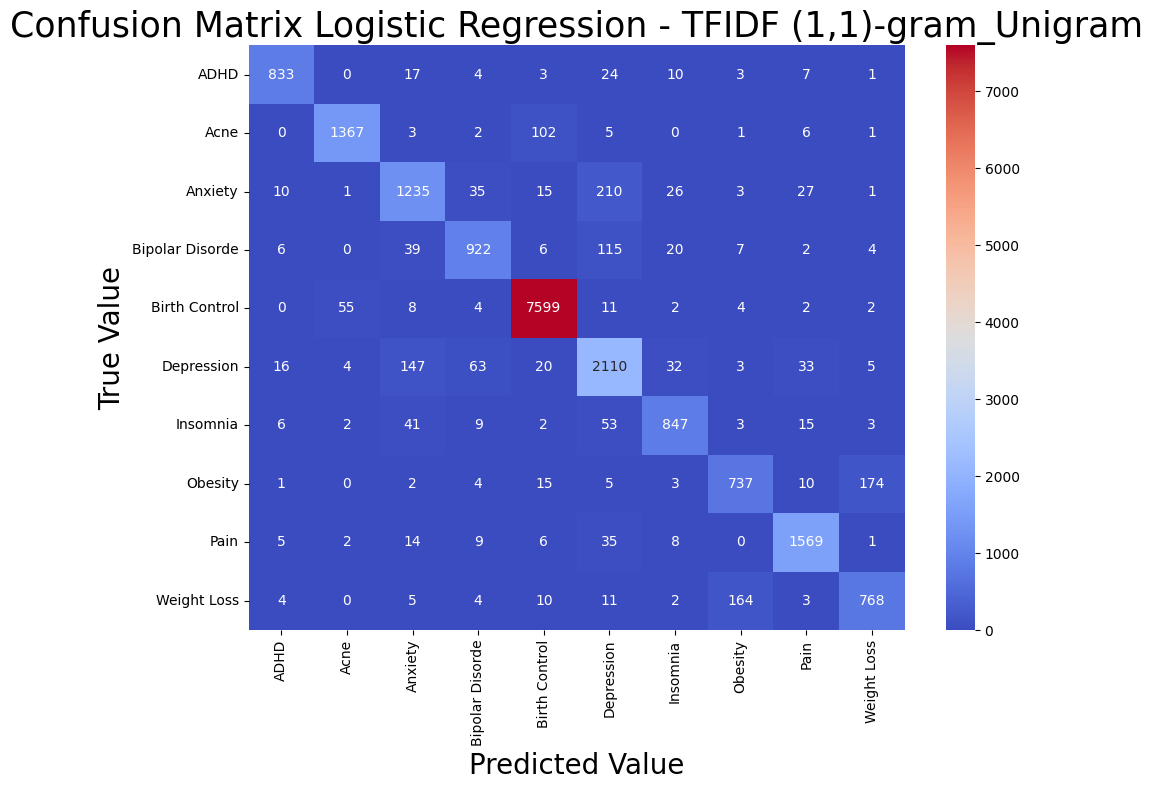

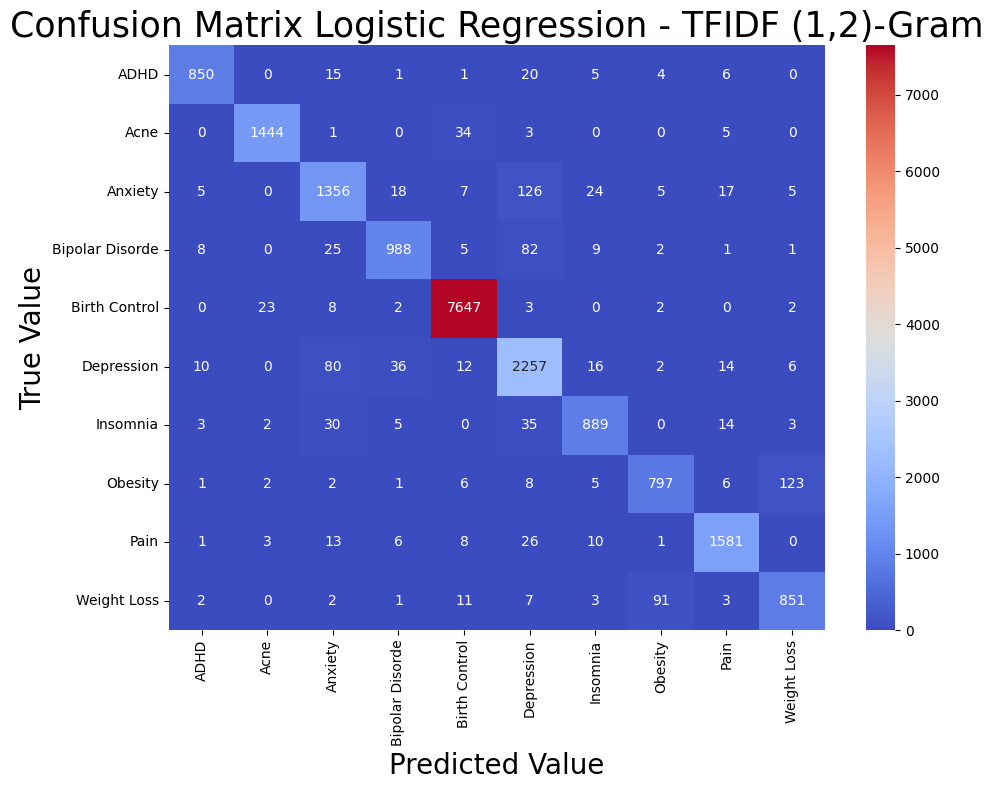

In [64]:
lr_model=[]
for name, x_tr, x_ts, modname in List_gram:
    print(f"{name}\n")
    lr = LogisticRegression(max_iter=1000, C=10)
    lr.fit(x_tr,y_train)
    y_pred = lr.predict(x_ts)

    joblib.dump(lr,f'./Models/lr_tfidf_{modname}_model.pkl')

    print(y_pred)
    print(y_test)
    print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
    
    print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
    print("=====================================================\n")
    
    cm =confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
    plt.title(f"Confusion Matrix Logistic Regression - {name}",fontsize=25)
    plt.xlabel("Predicted Value",fontsize=20)
    plt.ylabel("True Value",fontsize=20)
    plt.tight_layout()
    lr_model.append(lr) # 0 : Unigram (1,1), 1 : Unigram-Bigram (1,2)

### Random Forest

TFIDF (1,1)-gram_Unigram

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9293998480628007

Classification report:
              precision    recall  f1-score   support

           0      0.966     0.916     0.940       902
           1      0.989     0.954     0.971      1487
           2      0.878     0.823     0.850      1563
           3      0.949     0.855     0.900      1121
           4      0.966     0.996     0.981      7687
           5      0.846     0.910     0.877      2433
           6      0.916     0.869     0.892       981
           7      0.872     0.792     0.830       951
           8      0.931     0.955     0.943      1649
           9      0.849     0.833     0.841       971

    accuracy                          0.929     19745
   macro avg      0.916     0.890     0.902     19745
weighted avg      0.929     0.929     0.929     19745


TFIDF (1,2)-Gram

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9225626740947075

Classification report:
    

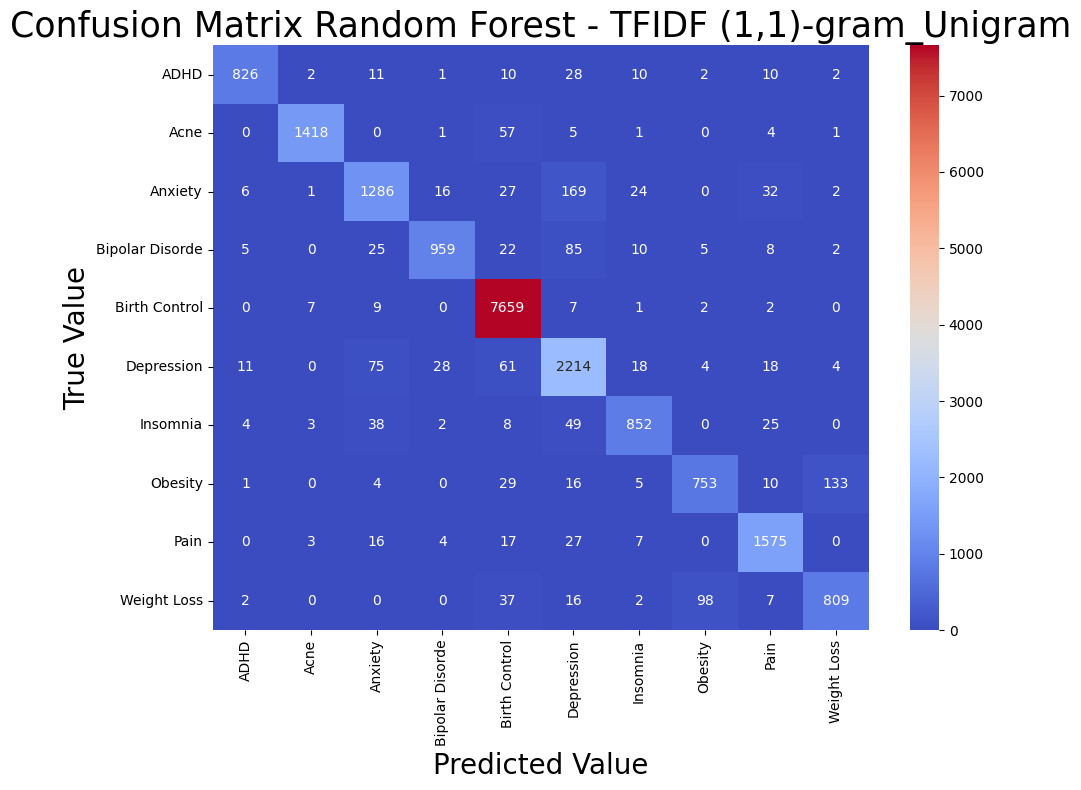

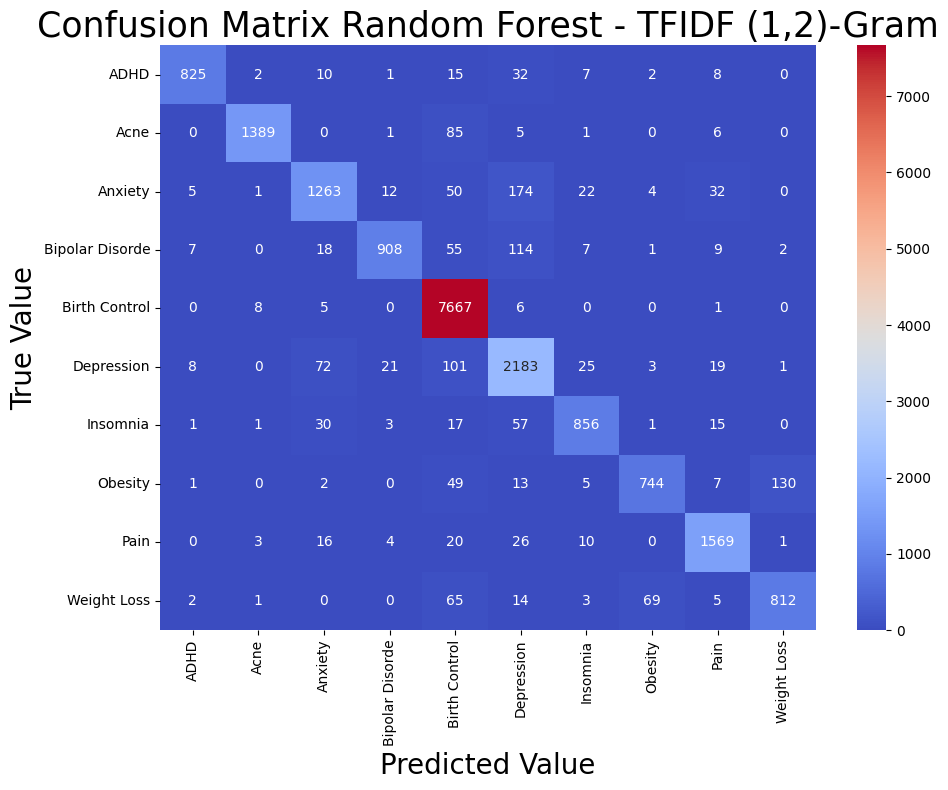

In [65]:
rf_model=[]
for name, x_tr, x_ts, modname in List_gram:
    print(f"{name}\n")
    rf = RandomForestClassifier(n_estimators=50,random_state=0) # 50 n_estimators in order to fasten the process
    rf.fit(x_tr,y_train)
    y_pred = rf.predict(x_ts)

    joblib.dump(rf,f'./Models/rf_tfidf_{modname}_model.pkl')

    print(y_pred)
    print(y_test)
    print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
    
    print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
    print("=====================================================\n")
    
    cm =confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
    plt.title(f"Confusion Matrix Random Forest - {name}",fontsize=25)
    plt.xlabel("Predicted Value",fontsize=20)
    plt.ylabel("True Value",fontsize=20)
    plt.tight_layout()
    rf_model.append(rf) # 0 : Unigram (1,1), 1 : Unigram-Bigram (1,2)

### XGBoost

TFIDF (1,1)-gram_Unigram

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9413015953405925

Classification report:
              precision    recall  f1-score   support

           0      0.962     0.946     0.954       902
           1      0.986     0.964     0.975      1487
           2      0.877     0.859     0.867      1563
           3      0.940     0.899     0.919      1121
           4      0.989     0.995     0.992      7687
           5      0.865     0.917     0.890      2433
           6      0.926     0.887     0.906       981
           7      0.873     0.809     0.840       951
           8      0.945     0.964     0.954      1649
           9      0.855     0.865     0.860       971

    accuracy                          0.941     19745
   macro avg      0.922     0.910     0.916     19745
weighted avg      0.941     0.941     0.941     19745


TFIDF (1,2)-Gram

[4 2 8 ... 4 4 0]
[4 2 8 ... 4 4 0]

Accuracy score: 0.9418080526715624

Classification report:
    

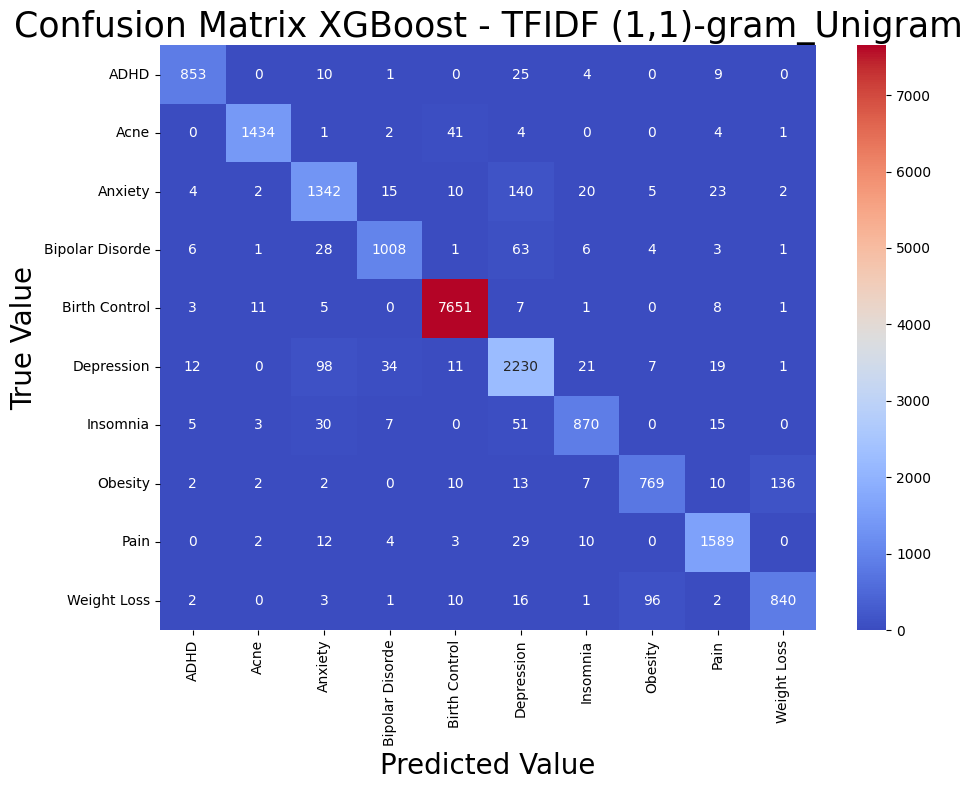

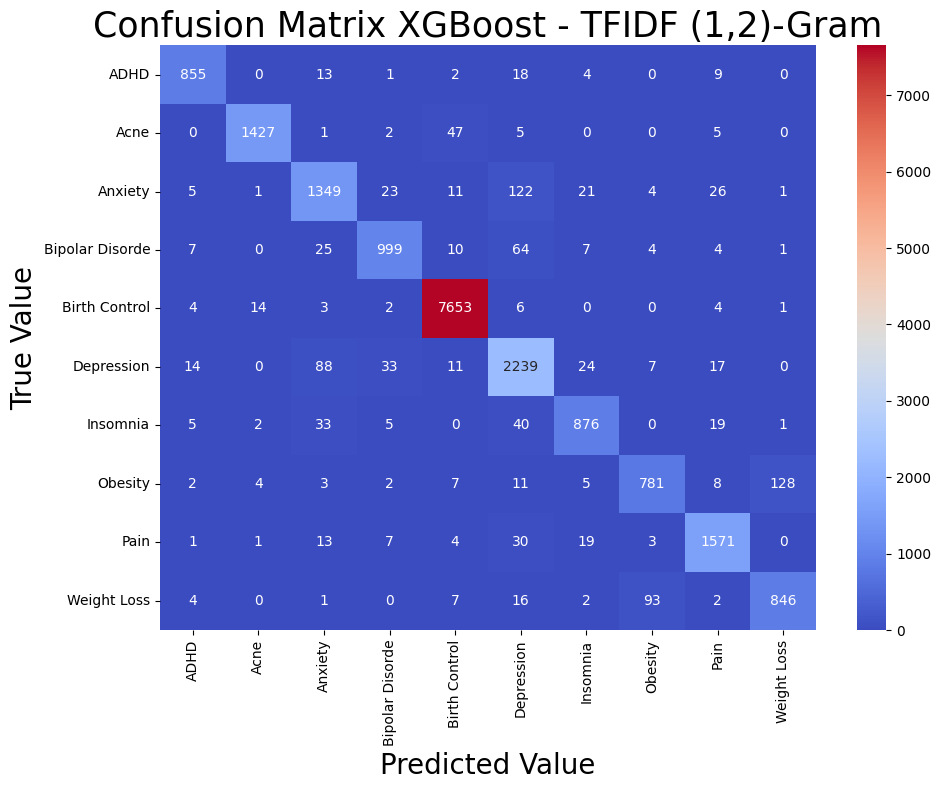

In [66]:
xgb_model=[]
for name, x_tr, x_ts, modname in List_gram:
    print(f"{name}\n")
    xgb = xgboost.XGBClassifier(n_estimators=1000,objective='multi:softmax')
    xgb.fit(x_tr,y_train)
    y_pred = xgb.predict(x_ts)

    joblib.dump(xgb,f'./Models/xgb_tfidf_{modname}_model.pkl')

    print(y_pred)
    print(y_test)
    print(f"\nAccuracy score: {accuracy_score(y_test,y_pred)}\n")
    
    print(f"Classification report:\n{classification_report(y_test,y_pred,digits=3)}")
    print("=====================================================\n")
    
    cm =confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',xticklabels=le.classes_,yticklabels=le.classes_)
    plt.title(f"Confusion Matrix XGBoost - {name}",fontsize=25)
    plt.xlabel("Predicted Value",fontsize=20)
    plt.ylabel("True Value",fontsize=20)
    plt.tight_layout()
    xgb_model.append(xgb) # 0 : Unigram (1,1), 1 : Unigram-Bigram (1,2)

In [67]:
xgb.get_params()

{'objective': 'multi:softmax',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 1000,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [68]:
# def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
#     labelid = list(classifier.classes_).index(classlabel)
#     feature_names = vectorizer.get_feature_names_out()
#     topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

#     for coef, feat in topn:
#         print(classlabel, feat, coef)

In [69]:
list(le.transform(["Acne"]))

[1]

In [70]:
pac.coef_.shape

(10, 605634)

In [71]:
lr.coef_.shape

(10, 605634)

In [72]:
mnb.n_features_in_

605634

In [74]:
pac.coef_.shape

(10, 605634)

In [75]:
tfidf_vectorizer_ubigram.get_feature_names_out().shape

(605634,)

In [76]:
xgb.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [77]:
rf.feature_importances_.shape

(605634,)

In [78]:
le.transform(["Birth Control"])[0]

4

In [79]:
rf.n_features_in_

605634

## Predict

In [80]:
x.iloc[100,1]

'I have situational depression, never dealt with it before. Wellbutrin had definitely helped get me out of bed each day. The &quot;situation&quot; is becoming better as well but I find my emotions aren&#039;t as out of whack. I cry less &amp; get angry less. I do feel it made me more anxious which I&#039;m already dealing with &amp; taking Buspirone for. I didn&#039;t experience many side effects BUT one that is hard to deal with but because it seems to make me get through each day a little better, I deal with it. It makes my throat feel closed, which is very annoying. I feel often like I can&#039;t breathe well &amp; that I can&#039;t swallow or that something is stuck in my throat. I&#039;ve not taken any other pills on several days to determine that it was the Wellbutrin that did it &amp; it is.'

In [2]:
import pandas as pd

main_data = pd.read_csv('./drug review dataset drugs.com/DrugsComPatient_raw.csv')
main_data.head()

Unnamed: 0                       drugName                    condition  \
0        4753                         Belviq                  Weight Loss   
1       67134            Magnesium hydroxide                 Constipation   
2        6918  Aluminum chloride hexahydrate                Hyperhidrosis   
3      164803       Phentermine / topiramate                  Weight Loss   
4      177619                     Duloxetine  Generalized Anxiety Disorde   

                                              review  rating  \
0  "WARNING...... NEVER STOP THIS MEDICATION COLD...     1.0   
1  "Oh my word! This stuff saved my life. It took...     7.0   
2  "It worked very well for the first 2 weeks wit...     6.0   
3  "I&#039;m a 5&#039;11 205lb size 12 former ath...     8.0   
4  "I initially took Cymbalta for distonia, which...    10.0   

                date  usefulCount  
0      June 18, 2015           52  
1     April 10, 2016           21  
2    August 20, 2016            2  
3  November 27, 2016           24  
4      July 30, 2015           67

In [3]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
punct = string.punctuation

In [4]:
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

lemmatizer = WordNetLemmatizer()

def get_tag(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith(('V','N','R')):
        return tag.lower()[0]
    else:
        return None
    
def lemmatize_word(words):
    pos = pos_tag(words)
    lemmatized_words = []
    for word, tag in pos:
        pos = get_tag(tag)
        if pos:
            lemmatized_words.append(lemmatizer.lemmatize(word,pos))
        else:
            lemmatized_words.append(word)
    return lemmatized_words

In [5]:
def clean_words(raw_review):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review,'html.parser').get_text()
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    # 3. Convert words to lower case and tokenize them
    words = word_tokenize(review_text.lower())
    # 4. Remove Punctuation
    words = [word for word in words if word not in punct]
    # 5. Remove stopwords
    words = [w for w in words if w not in stopwords]
    # 6. Lemmatize words
    words = lemmatize_word(words)
    # 7. Join the words back into one string separated by space and return
    return " ".join(words)

In [6]:
def extract_top_drugs(label):
    data_top = main_data[(main_data['rating']>=9) & (main_data['usefulCount']>=100)].sort_values(by=['rating','usefulCount'],ascending=[False, False])
    data_top.head()
    drug_list = data_top[data_top['condition']==label]['drugName'][:3].tolist()
    return drug_list

In [7]:
import joblib
# Load LabelEncoder
le = joblib.load('./label_encoder.pkl')

# Load TFIDFVectorizer
tfidf_ubigram = joblib.load('./Bag of Words/tfidf_vectorizer_(1,2)-gram.pkl')

# Load Model
models = {
    "Naive Bayes": joblib.load("./Models/mnb_tfidf_(1,2)-gram_model.pkl"),
    "K-Nearest Neighbors": joblib.load("./Models/knn_tfidf_(1,2)-gram_model.pkl"),
    "Support Vector Machine": joblib.load("./Models/svc_tfidf_(1,2)-gram_model.pkl"),
    "Passive Aggressive Classifier": joblib.load("./Models/pac_tfidf_(1,2)-gram_model.pkl"),
    "Logistic Regression": joblib.load("./Models/lr_tfidf_(1,2)-gram_model.pkl"),
    "Random Forest": joblib.load("./Models/rf_tfidf_(1,2)-gram_model.pkl"),
    "XGBoost": joblib.load("./Models/xgb_tfidf_(1,2)-gram_model.pkl")
}

In [8]:
models['Logistic Regression'].coef_.shape

(10, 605634)

In [9]:
models['Support Vector Machine'].coef_.shape

(45, 605634)

In [10]:
model = models['XGBoost']
def predict_condition(text):
    text = [clean_words(text)]
    text = tfidf_ubigram.transform(text)
    pred = model.predict(text)[0]
    return le.inverse_transform([pred])[0]

In [11]:
sentences = ["I have situational depression, never dealt with it before. Wellbutrin had definitely helped get me out of bed each day. The &quot;situation&quot; is becoming better as well but I find my emotions aren&#039;t as out of whack. I cry less &amp; get angry less. I do feel it made me more anxious which I&#039;m already dealing with &amp; taking Buspirone for. I didn&#039;t experience many side effects BUT one that is hard to deal with but because it seems to make me get through each day a little better, I deal with it. It makes my throat feel closed, which is very annoying. I feel often like I can&#039;t breathe well &amp; that I can&#039;t swallow or that something is stuck in my throat. I&#039;ve not taken any other pills on several days to determine that it was the Wellbutrin that did it &amp; it is."]

In [12]:
prediction = predict_condition(sentences[0])

top_drugs = extract_top_drugs(prediction)

print("Condition:",prediction)
print("Top Drugs:")
for i, drug in enumerate(top_drugs):
    print(f"{i+1}. {drug}")

Condition: Depression
Top Drugs:
1. Sertraline
2. Zoloft
3. Viibryd


In [13]:
models['Support Vector Machine'].coef_[2][0].shape

(1, 605634)

In [14]:
models['Logistic Regression'].coef_[1].shape

(605634,)

In [15]:
models['Support Vector Machine'].coef_[0].toarray().shape

(1, 605634)

In [16]:
models['Naive Bayes'].feature_log_prob_.shape

(10, 605634)

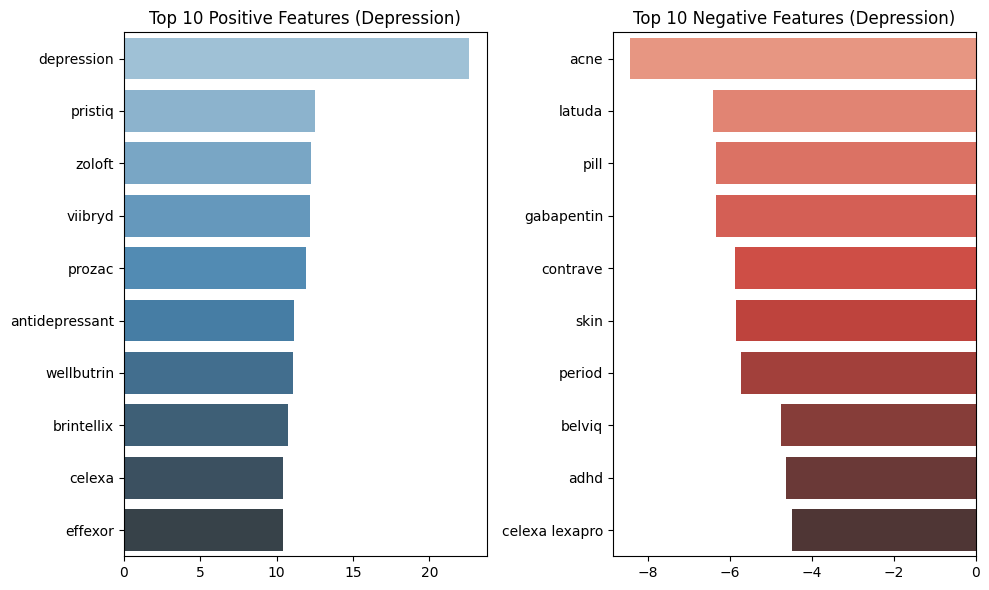

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_features(vectorizer, classifier, class_label, le, top_features=10):
    feature_names = vectorizer.get_feature_names_out()
    class_index = le.transform([class_label])[0]
    
    if isinstance(classifier, (LogisticRegression, PassiveAggressiveClassifier)):
        coef = classifier.coef_[class_index]
    elif isinstance(classifier, MultinomialNB):
        coef = classifier.feature_log_prob_[class_index]
    elif isinstance(classifier, (RandomForestClassifier, xgboost.XGBClassifier, KNeighborsClassifier)):
        print(f"The model '{type(classifier).__name__}' does not provide direct feature importances.")
        return
    else:
        print(f"The model '{type(classifier).__name__}' has no suitable attribute for extracting feature importances. Unable to plot the top feature for label {class_label}.")
        return
    
    # if len(coef.shape) > 1:
    #     coef = coef[class_index]

    top_positive_coefficients = sorted(zip(coef, feature_names), key=lambda x: x[0], reverse=True)[:top_features]
    top_negative_coefficients = sorted(zip(coef, feature_names), key=lambda x: x[0])[:top_features]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    top_coefficients = [coef for coef, feat in top_positive_coefficients]
    top_features_names = [feat for coef, feat in top_positive_coefficients]
    sns.barplot(x=top_coefficients, y=top_features_names, palette="Blues_d",hue=top_features_names)
    plt.title(f"Top {top_features} Positive Features ({class_label})")
    
    plt.subplot(1, 2, 2)
    top_coefficients = [coef for coef, feat in top_negative_coefficients]
    top_features_names = [feat for coef, feat in top_negative_coefficients]
    sns.barplot(x=top_coefficients, y=top_features_names, palette="Reds_d",hue=top_features_names)
    plt.title(f"Top {top_features} Negative Features ({class_label})")
    
    plt.tight_layout()
    plt.show()
    
vectorizer = tfidf_ubigram
classifier = models['Logistic Regression']
class_label = 'Depression'
plot_top_features(vectorizer, classifier, class_label,le)